# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### In a nutshell:
Kickstarter is an online funding platform designed as a connection between creativity and capital. Its purpose is to break free from a central focus on profit at all costs.  The "backers" are individuals or groups that pledge money if a project gets fully funded. Success is determined as a project meeting its funding goal within its timeline.


## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Answers below:
1. 281,856 rows and 14 columns
2. All types of variables - integer, decimal, date/time, and categorical
3. missing variables in the following categories: name, usd pledged
4. a project without a name is still a project, so just changed the name to unknown; a project without pledges, though, is neither a success nor a failure and therefore useless to include in dataset (dropped)
5. 281,646 rows after handling missing data
6. I found no odd or inappropriate values in any of the columns, including usd pledged, which has no negative values
7. done

In [2]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

df = pd.read_excel("Kickstarter_Dataset.xlsx")

## this is a large dataset, we want to see all rows 
# pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!



In [3]:
## determine dataset shape (number of rows and columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [269]:
df["usd_pledged"] = df["usd pledged"]
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state,pct_funded,usd_pledged
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed,29.016752,3984.000000
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed,2.082379,1561.784015
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed,27.682680,4152.402045
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed,0.097178,19.435528
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed,14.540383,2908.076574


In [270]:
df.drop(columns = "usd pledged", inplace = True)
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,backers,state,pct_funded,usd_pledged
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,46,failed,29.016752,3984.000000
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,31,failed,2.082379,1561.784015
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,46,failed,27.682680,4152.402045
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,6,failed,0.097178,19.435528
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,29,failed,14.540383,2908.076574


In [271]:
## determine which variables have missing data 
df.isnull().sum()


ID               0
name             0
main_category    0
category         0
country          0
currency         0
launched         0
deadline         0
length_days      0
goal             0
pledged          0
backers          0
state            0
pct_funded       0
usd_pledged      0
dtype: int64

In [272]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"
df["name"].replace(np.nan, "Unknown Project Name", inplace = True)
#checking to see that it was done correctly
df.loc[df["name"]=="Unknown Project Name"]

## drop all the rows where "usd pledged" is missing
df.dropna(subset=["usd_pledged"], inplace = True)

# checking for missing values
df.isnull().sum()

ID               0
name             0
main_category    0
category         0
country          0
currency         0
launched         0
deadline         0
length_days      0
goal             0
pledged          0
backers          0
state            0
pct_funded       0
usd_pledged      0
dtype: int64

In [273]:
## inappropriate values in categorical variables; check value counts
df.info()
df["main_category"].value_counts()
df["category"].value_counts()
df["country"].value_counts()
df["currency"].value_counts()
df["state"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281646 non-null  int64         
 1   name           281646 non-null  object        
 2   main_category  281646 non-null  object        
 3   category       281646 non-null  object        
 4   country        281646 non-null  object        
 5   currency       281646 non-null  object        
 6   launched       281646 non-null  datetime64[ns]
 7   deadline       281646 non-null  datetime64[ns]
 8   length_days    281646 non-null  int64         
 9   goal           281646 non-null  float64       
 10  pledged        281646 non-null  float64       
 11  backers        281646 non-null  int64         
 12  state          281646 non-null  object        
 13  pct_funded     281646 non-null  float64       
 14  usd_pledged    281646 non-null  float64       
dtype

failed        168503
successful    113143
Name: state, dtype: int64

In [274]:
df.loc[df["usd_pledged"]<0].index

Int64Index([], dtype='int64')

In [275]:
df3 = df.copy()

In [276]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on

df3.drop(columns = ["ID", "name", "launched", "deadline", "pledged"], inplace = True)

df3.head()


,main_category,category,country,currency,length_days,goal,backers,state,pct_funded,usd_pledged
0,Food,Cookbooks,US,USD,29,13730.0,46,failed,29.016752,3984.000000
1,Technology,3D Printing,AT,EUR,35,75000.0,31,failed,2.082379,1561.784015
2,Technology,3D Printing,AT,EUR,30,15000.0,46,failed,27.682680,4152.402045
3,Technology,3D Printing,AT,EUR,30,20000.0,6,failed,0.097178,19.435528
4,Technology,3D Printing,AT,EUR,40,20000.0,29,failed,14.540383,2908.076574


In [279]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df3["pct_funded"] = (df3["usd_pledged"]/df3["goal"])*100

In [281]:
df3.describe()

,length_days,goal,backers,pct_funded,usd_pledged
count,281646.000000,2.816460e+05,281646.000000,2.816460e+05,2.816460e+05
mean,33.976520,4.181597e+04,111.934801,2.762000e+02,8.575848e+03
std,12.894187,1.043830e+06,996.631624,1.826263e+04,8.916948e+04
min,1.000000,1.000000e-02,0.000000,0.000000e+00,0.000000e+00
25%,30.000000,2.000000e+03,2.000000,6.000000e-01,4.000000e+01
50%,30.000000,5.000000e+03,15.000000,1.661484e+01,6.910000e+02
75%,36.000000,1.500000e+04,62.000000,1.080828e+02,4.109040e+03
max,92.000000,1.000000e+08,219382.000000,5.526657e+06,2.033899e+07


## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [282]:
df3 = df.copy()

In [283]:
df3["avg_pledge_per_backer"] = (df3["usd_pledged"]/df3["backers"])
df3.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,46,failed,29.016752,3984.000000,86.608696
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,31,failed,2.082379,1561.784015,50.380130
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,46,failed,27.682680,4152.402045,90.269610
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,6,failed,0.097178,19.435528,3.239255
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,29,failed,14.540383,2908.076574,100.278503


In [284]:
# removing pct_funded outliers

df3["zscore_pct_funded"] = np.abs(stats.zscore(df3["pct_funded"]))

df3 = df3[df3["zscore_pct_funded"]<=3]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281533 entries, 0 to 281855
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     281533 non-null  int64         
 1   name                   281533 non-null  object        
 2   main_category          281533 non-null  object        
 3   category               281533 non-null  object        
 4   country                281533 non-null  object        
 5   currency               281533 non-null  object        
 6   launched               281533 non-null  datetime64[ns]
 7   deadline               281533 non-null  datetime64[ns]
 8   length_days            281533 non-null  int64         
 9   goal                   281533 non-null  float64       
 10  pledged                281533 non-null  float64       
 11  backers                281533 non-null  int64         
 12  state                  281533 non-null  obje

In [285]:
#removing usd_pledged outliers

df3["zscore_usd_pledged"] = np.abs(stats.zscore(df3["usd_pledged"]))

usd_pledged_outlier = df3.loc[df3["zscore_usd_pledged"]>3]

df3 = df3[df3['zscore_usd_pledged']<=3]

df3.describe()

,ID,length_days,goal,pledged,backers,pct_funded,usd_pledged,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged
count,2.805570e+05,280557.000000,2.805570e+05,2.805570e+05,280557.000000,280557.000000,280557.000000,2.472030e+05,2.805570e+05,280557.000000
mean,1.075031e+09,33.972145,4.135771e+04,6.570999e+03,86.007239,91.448293,5763.580987,inf,1.348263e-02,0.108076
std,6.195366e+08,12.901238,1.044857e+06,3.060791e+04,442.842704,573.449584,17663.577599,NaN,3.010870e-02,0.173054
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001
25%,5.373183e+08,30.000000,2.000000e+03,4.800000e+01,2.000000,0.580000,38.116275,2.375000e+01,9.345478e-03,0.071771
50%,1.076008e+09,30.000000,5.000000e+03,7.590000e+02,15.000000,16.280000,680.000000,4.636111e+01,1.437090e-02,0.093679
75%,1.611662e+09,36.000000,1.500000e+04,4.349000e+03,61.000000,107.780000,4049.000000,8.073333e+01,1.510185e-02,0.097422
max,2.147472e+09,92.000000,1.000000e+08,6.465690e+06,154926.000000,54575.666667,271154.010000,inf,2.973261e+00,2.996524


In [286]:
#removing length_days outliers

df3["zscore_length_days"] = np.abs(stats.zscore(df3["length_days"]))

df3 = df3[df3['zscore_length_days']<=3]

df3.describe()

,ID,length_days,goal,pledged,backers,pct_funded,usd_pledged,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days
count,2.775410e+05,277541.000000,2.775410e+05,2.775410e+05,277541.000000,277541.000000,277541.000000,2.446300e+05,2.775410e+05,277541.000000,277541.000000
mean,1.074884e+09,33.394522,4.141209e+04,6.609877e+03,86.560699,91.843216,5793.518921,inf,1.348981e-02,0.108331,0.676164
std,6.195392e+08,11.702753,1.048134e+06,3.075944e+04,445.134968,576.232245,17735.142958,NaN,3.025716e-02,0.173784,0.606337
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001,0.002159
25%,5.371480e+08,30.000000,2.000000e+03,4.700000e+01,2.000000,0.573846,38.000000,2.364649e+01,9.342226e-03,0.071805,0.307889
50%,1.075699e+09,30.000000,5.000000e+03,7.600000e+02,15.000000,16.360000,681.000000,4.625000e+01,1.436928e-02,0.093713,0.307889
75%,1.611355e+09,35.000000,1.500000e+04,4.370000e+03,61.000000,107.875626,4058.892602,8.058824e+01,1.510190e-02,0.097422,0.854792
max,2.147472e+09,72.000000,1.000000e+08,6.465690e+06,154926.000000,54575.666667,271154.010000,inf,2.973261e+00,2.996524,2.947618


In [287]:
#removing goal outliers

df3["zscore_goal"] = np.abs(stats.zscore(df3["goal"]))

df3 = df3[df3['zscore_goal']<=3]

df3.describe()

,ID,length_days,goal,pledged,backers,pct_funded,usd_pledged,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal
count,2.772650e+05,277265.000000,2.772650e+05,2.772650e+05,277265.000000,277265.000000,277265.000000,2.444460e+05,2.772650e+05,277265.000000,277265.000000,277265.000000
mean,1.074877e+09,33.384178,2.196067e+04,6.613241e+03,86.637094,91.934595,5796.955642,inf,1.348818e-02,0.108334,0.675629,0.039358
std,6.195440e+08,11.693109,9.612154e+04,3.077047e+04,445.346486,576.511694,17740.050507,NaN,3.027217e-02,0.173840,0.605875,0.084886
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001,0.002159,0.000084
25%,5.370997e+08,30.000000,2.000000e+03,4.800000e+01,2.000000,0.587881,38.220047,2.366667e+01,9.341496e-03,0.071765,0.307889,0.029493
50%,1.075691e+09,30.000000,5.000000e+03,7.630000e+02,15.000000,16.433333,683.000000,4.625000e+01,1.436490e-02,0.093692,0.307889,0.034740
75%,1.611354e+09,35.000000,1.500000e+04,4.376000e+03,61.000000,107.911111,4061.000000,8.058983e+01,1.510169e-02,0.097422,0.854792,0.038079
max,2.147472e+09,72.000000,3.141592e+06,6.465690e+06,154926.000000,54575.666667,271154.010000,inf,2.973261e+00,2.996524,2.947618,2.957813


In [288]:
#removing backers outliers

df3["zscore_backers"] = np.abs(stats.zscore(df3["backers"]))

df3 = df3[df3['zscore_backers']<=3]

df3.describe()

,ID,length_days,goal,pledged,backers,pct_funded,usd_pledged,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers
count,2.750100e+05,275010.000000,2.750100e+05,2.750100e+05,275010.000000,275010.000000,275010.000000,2.421910e+05,2.750100e+05,275010.000000,275010.000000,275010.000000,275010.000000
mean,1.074864e+09,33.385346,2.174104e+04,5.404255e+03,64.122643,86.760658,4928.814840,inf,1.334711e-02,0.099539,0.676926,0.039373,0.201280
std,6.196181e+08,11.712871,9.614340e+04,1.710534e+04,144.779193,562.899767,13733.221987,NaN,2.965611e-02,0.127861,0.606713,0.084947,0.260247
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001,0.002159,0.000084,0.000815
25%,5.370576e+08,30.000000,2.000000e+03,4.500000e+01,2.000000,0.555556,36.000000,2.360898e+01,9.349710e-03,0.071463,0.307889,0.029970,0.122685
50%,1.075780e+09,30.000000,5.000000e+03,7.400000e+02,14.000000,15.785250,660.000000,4.633333e+01,1.437262e-02,0.093537,0.307889,0.034740,0.178821
75%,1.611410e+09,35.000000,1.500000e+04,4.185000e+03,59.000000,107.300000,3900.000000,8.086296e+01,1.510099e-02,0.097399,0.854792,0.038079,0.192294
max,2.147472e+09,72.000000,3.141592e+06,1.331937e+06,1422.000000,54575.666667,268654.025500,inf,2.973261e+00,2.967998,2.947618,2.957813,2.998486


In [289]:
#finding mode of campaign lengths
df3["length_days"].mode()

0    30
Name: length_days, dtype: int64

In [290]:
## calculate the range for all numeric variables
days_range = df3["length_days"].max() - df3["length_days"].min()
goal_range = df3["goal"].max() - df3["goal"].min()
pledged_range = df3["usd_pledged"].max() - df3["usd_pledged"].min()
backers_range = df3["backers"].max() - df3["backers"].min()
pct_funded_range = df3["pct_funded"].max() - df3["pct_funded"].min()

print("Ranges")
print("--"*18)
print(f"Project length:\t\t{days_range} days")
print(f"Goal Amount:\t\t${int(goal_range)}")
print(f"USD Pledged Amount:\t${int(pledged_range)}")
print(f"Number of Backers:\t{int(backers_range)}")
print(f"Percent Funded:\t\t{int(pct_funded_range)*100}%")

Ranges
------------------------------------
Project length:		71 days
Goal Amount:		$3141591
USD Pledged Amount:	$268654
Number of Backers:	1422
Percent Funded:		5457500%


In [291]:
## frequency of categorical variable groups
df3["main_category"].value_counts()


Film & Video    49700
Music           40025
Publishing      29898
Art             21518
Games           21234
Technology      20677
Design          19199
Food            18770
Fashion         15685
Theater          9169
Photography      8533
Comics           7677
Crafts           6289
Journalism       3468
Dance            3168
Name: main_category, dtype: int64

In [292]:
df3["category"].value_counts()

Product Design        13841
Documentary           12906
Shorts                10513
Music                 10495
Food                   9448
Tabletop Games         8219
Film & Video           7551
Video Games            7367
Fiction                7220
Fashion                6902
Nonfiction             6504
Theater                6318
Art                    6145
Rock                   5739
Children's Books       5100
Photography            4913
Indie Rock             4870
Webseries              4685
Apparel                4629
Technology             4558
Narrative Film         4253
Comics                 4080
Publishing             4051
Apps                   3970
Country & Folk         3766
Web                    3461
Crafts                 3393
Hip-Hop                3009
Design                 2812
Pop                    2720
Public Art             2610
Painting               2601
Hardware               2496
Classical Music        2183
Mixed Media            2170
Games               

In [24]:
df3["country"].value_counts()

US    226736
GB     23655
CA      9790
AU      5141
DE      2095
NL      1859
FR      1533
IT      1384
ES      1078
SE      1043
NZ       989
DK       663
IE       472
NO       426
CH       380
BE       327
AT       279
SG        69
HK        46
LU        33
MX         4
Name: country, dtype: int64

In [293]:
df3["currency"].value_counts()

USD    223747
GBP     23656
CAD      9790
EUR      9056
AUD      5141
SEK      1043
NZD       989
DKK       663
NOK       426
CHF       380
SGD        69
HKD        46
MXN         4
Name: currency, dtype: int64

In [294]:
df3["state"].value_counts()

failed        166210
successful    108800
Name: state, dtype: int64

<AxesSubplot:title={'center':'Number of Projects by Main Category'}, xlabel='main_category', ylabel='Count'>

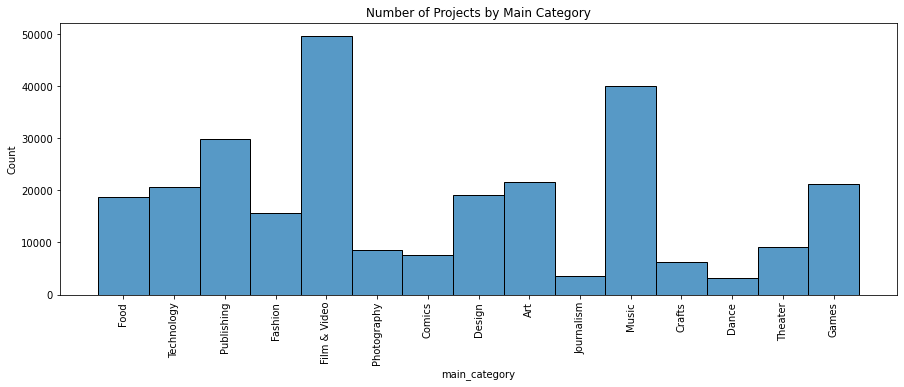

In [295]:
# visualization: number of projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Main Category")
sns.histplot(x = df3["main_category"], kde = False)


<AxesSubplot:title={'center':'Number of Projects by Failure/Success'}, xlabel='state', ylabel='Count'>

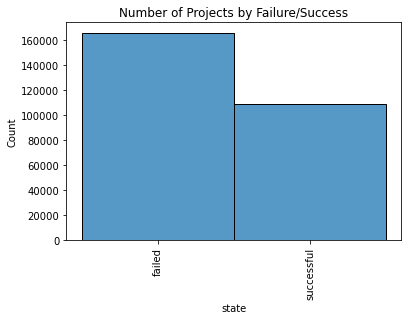

In [296]:
# visualization: number of projects by state
plt.title("Number of Projects by Failure/Success")
plt.xticks(rotation = 90)
sns.histplot(x = df3["state"], kde = False)

<AxesSubplot:title={'center':'Number of Projects by Country'}, xlabel='country', ylabel='Count'>

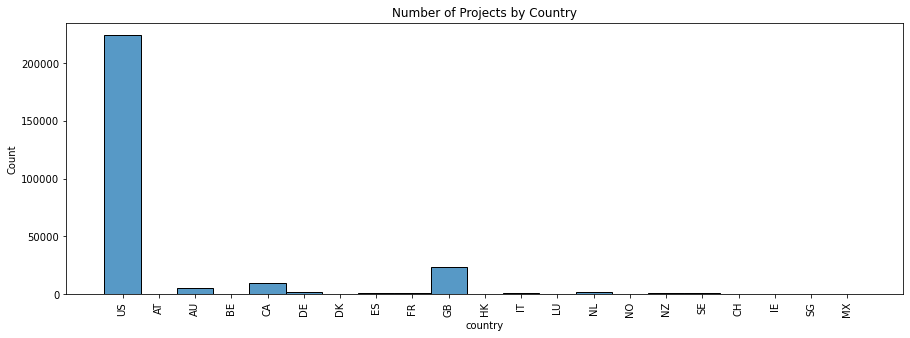

In [297]:
# visualization: number of projects by country

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Country")
sns.histplot(x = df3["country"], kde = False)

<AxesSubplot:title={'center':'Number of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='count'>

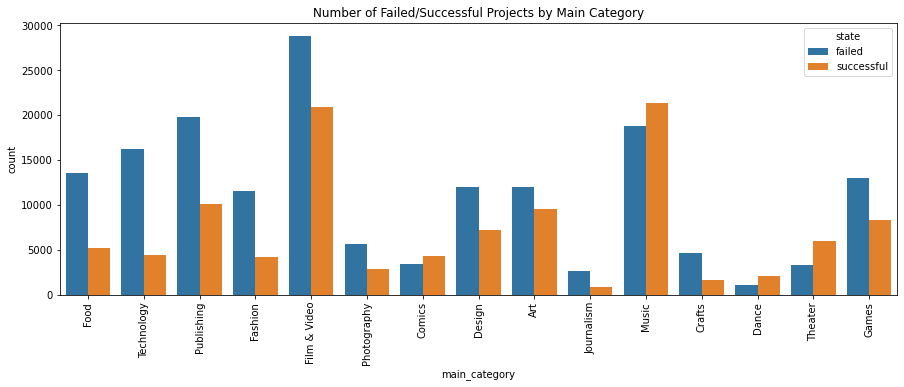

In [298]:
# visualization: number of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Failed/Successful Projects by Main Category")
sns.countplot(x = df3["main_category"], hue = df3["state"])

## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [299]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     275010 non-null  int64         
 1   name                   275010 non-null  object        
 2   main_category          275010 non-null  object        
 3   category               275010 non-null  object        
 4   country                275010 non-null  object        
 5   currency               275010 non-null  object        
 6   launched               275010 non-null  datetime64[ns]
 7   deadline               275010 non-null  datetime64[ns]
 8   length_days            275010 non-null  int64         
 9   goal                   275010 non-null  float64       
 10  pledged                275010 non-null  float64       
 11  backers                275010 non-null  int64         
 12  state                  275010 non-null  obje

In [300]:
df3.drop(columns = ["ID", "zscore_pct_funded", "zscore_usd_pledged", "zscore_length_days", "zscore_goal", "zscore_backers"], inplace = True)
df3.corr()



,length_days,goal,pledged,backers,pct_funded,usd_pledged,avg_pledge_per_backer
length_days,1.000000,0.080358,0.014131,-0.013663,-0.033644,0.018193,0.026745
goal,0.080358,1.000000,0.071428,0.008869,-0.025747,0.053480,0.089005
pledged,0.014131,0.071428,1.000000,0.648473,0.076931,0.826180,0.205634
backers,-0.013663,0.008869,0.648473,1.000000,0.138502,0.723062,0.026642
pct_funded,-0.033644,-0.025747,0.076931,0.138502,1.000000,0.102318,0.011960
usd_pledged,0.018193,0.053480,0.826180,0.723062,0.102318,1.000000,0.262041
avg_pledge_per_backer,0.026745,0.089005,0.205634,0.026642,0.011960,0.262041,1.000000


In [301]:
df3.drop(columns = "pledged", inplace = True)
df3.corr()

# strongest correlation between amount pledged and number of backers

,length_days,goal,backers,pct_funded,usd_pledged,avg_pledge_per_backer
length_days,1.000000,0.080358,-0.013663,-0.033644,0.018193,0.026745
goal,0.080358,1.000000,0.008869,-0.025747,0.053480,0.089005
backers,-0.013663,0.008869,1.000000,0.138502,0.723062,0.026642
pct_funded,-0.033644,-0.025747,0.138502,1.000000,0.102318,0.011960
usd_pledged,0.018193,0.053480,0.723062,0.102318,1.000000,0.262041
avg_pledge_per_backer,0.026745,0.089005,0.026642,0.011960,0.262041,1.000000


In [302]:
## average pledge across categoricial variables (groupby)
df3["usd_pledged"].groupby(df3["main_category"]).mean()

main_category
Art             2726.517267
Comics          4871.263912
Crafts          1428.291386
Dance           3389.202526
Design          9784.947908
Fashion         4193.385879
Film & Video    5313.333855
Food            4303.383449
Games           7470.869958
Journalism      2466.364742
Music           3683.715176
Photography     2929.401724
Publishing      2772.055234
Technology      8833.804899
Theater         3931.039963
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Main Category'}, xlabel='main_category', ylabel='usd_pledged'>

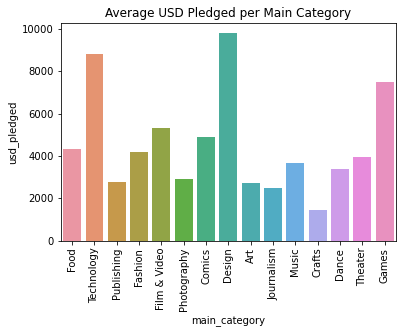

In [303]:
# visualizing Average USD Pledged per Main Category
plt.title("Average USD Pledged per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["usd_pledged"], ci = None)


In [304]:
df3["usd_pledged"].groupby(df3["category"]).mean()

category
3D Printing           21465.394056
Academic               1856.178751
Accessories            5537.666924
Action                 2895.818539
Animals                2382.214298
Animation              4943.815778
Anthologies            6346.914786
Apparel                3714.353763
Apps                   1412.339561
Architecture           4473.243686
Art                    2931.736739
Art Books              7066.271042
Audio                  3261.548250
Bacon                  1598.635068
Blues                  3901.857626
Calendars              3274.572065
Camera Equipment      25525.435672
Candles                 605.679972
Ceramics               4889.230446
Children's Books       2802.383252
Childrenswear          3054.975307
Chiptune               5501.673158
Civic Design           7286.745961
Classical Music        4404.823448
Comedy                 4440.023970
Comic Books            2947.974929
Comics                 4732.423323
Community Gardens      1710.510254
Conceptual 

In [305]:
df3["usd_pledged"].groupby(df3["country"]).mean()

country
AT    4668.648763
AU    3614.648662
BE    2550.476894
CA    3771.083003
CH    6019.428984
DE    4216.698402
DK    4240.095788
ES    3077.358297
FR    6121.273454
GB    4544.202940
HK    2979.728995
IE    4791.387437
IT    2884.938378
LU    4329.165422
MX       8.136906
NL    4524.037385
NO    2556.932683
NZ    3814.805486
SE    3762.922443
SG    2649.047928
US    5094.192764
Name: usd_pledged, dtype: float64

In [306]:
df3["usd_pledged"].groupby(df3["currency"]).mean()

currency
AUD    3614.648662
CAD    3771.083003
CHF    6019.428984
DKK    4240.095788
EUR    4246.717071
GBP    4544.202940
HKD    2979.728995
MXN       8.136906
NOK    2556.932683
NZD    3814.805486
SEK    3762.922443
SGD    2649.047928
USD    5094.192764
Name: usd_pledged, dtype: float64

In [307]:
#average usd pledged by state

df3["usd_pledged"].groupby(df3["state"]).mean()

state
failed         1222.796123
successful    10590.371558
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Success/Fail State'}, xlabel='state', ylabel='usd_pledged'>

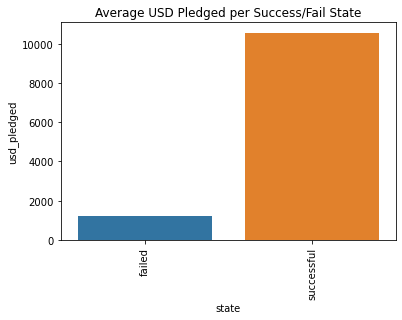

In [308]:
# visualizing Average USD Pledged per State
plt.title("Average USD Pledged per Success/Fail State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["usd_pledged"], ci = None)

In [309]:
## average number of backers across categorical variables (groupby)
df3["backers"].groupby(df3["main_category"]).mean()

main_category
Art              38.799191
Comics          108.165038
Crafts           26.476546
Dance            44.116793
Design          118.098599
Fashion          46.616513
Film & Video     54.756660
Food             49.088599
Games           142.317839
Journalism       37.057093
Music            52.476377
Photography      38.065276
Publishing       47.984581
Technology       75.814770
Theater          48.374196
Name: backers, dtype: float64

In [310]:
df3["backers"].groupby(df3["category"]).mean()

category
3D Printing           107.900709
Academic               28.051107
Accessories            68.091014
Action                 23.780738
Animals                34.532663
Animation              60.232964
Anthologies           179.935614
Apparel                40.460359
Apps                   18.762469
Architecture           41.466667
Art                    40.178356
Art Books             107.274539
Audio                  50.931159
Bacon                  27.803681
Blues                  51.968254
Calendars              97.803828
Camera Equipment      165.567568
Candles                13.941368
Ceramics               52.522388
Children's Books       49.901961
Childrenswear          38.331210
Chiptune              103.142857
Civic Design           78.339367
Classical Music        51.243243
Comedy                 51.958443
Comic Books            83.573681
Comics                 98.732843
Community Gardens      21.274678
Conceptual Art         27.749077
Cookbooks              71.607046
C

In [311]:
df3["backers"].groupby(df3["country"]).mean()

country
AT     45.921147
AU     52.107567
BE     43.889571
CA     53.952094
CH     45.421053
DE     55.189976
DK     58.638009
ES     52.750464
FR     68.375163
GB     56.989770
HK     70.065217
IE     56.593220
IT     35.502168
LU     36.969697
MX      9.250000
NL     47.143088
NO     37.032864
NZ     59.302326
SE     59.917546
SG    114.391304
US     66.222135
Name: backers, dtype: float64

In [312]:
df3["backers"].groupby(df3["currency"]).mean()

currency
AUD     52.107567
CAD     53.952094
CHF     45.421053
DKK     58.638009
EUR     51.780919
GBP     56.989770
HKD     70.065217
MXN      9.250000
NOK     37.032864
NZD     59.302326
SEK     59.917546
SGD    114.391304
USD     66.222135
Name: backers, dtype: float64

In [313]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         15.943553
successful    137.724173
Name: backers, dtype: float64

<AxesSubplot:title={'center':'Average Number Backers per State'}, xlabel='state', ylabel='backers'>

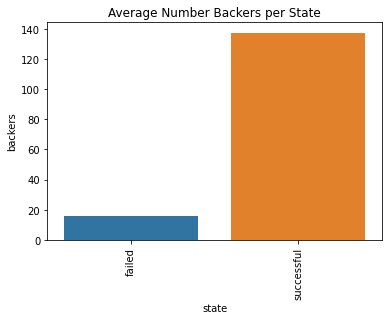

In [314]:
# visualizing Average Number Backers per State
plt.title("Average Number Backers per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["backers"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per Main Category'}, xlabel='main_category', ylabel='goal'>

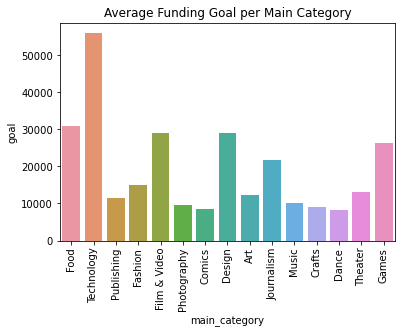

In [315]:
# visualizing Average Funding Goal per Main Category
plt.title("Average Funding Goal per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per State'}, xlabel='state', ylabel='goal'>

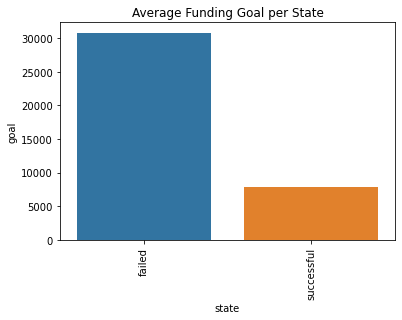

In [316]:
# visualizing Average Funding Goal per State
plt.title("Average Funding Goal per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Avg Goal of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='goal'>

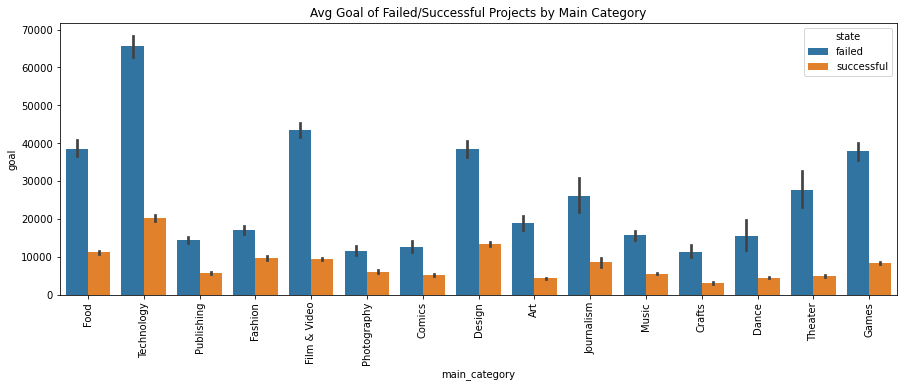

In [317]:
# visualization: avg goal of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Avg Goal of Failed/Successful Projects by Main Category")
sns.barplot(x = df3["main_category"], y = df3["goal"], hue = df3["state"])

<AxesSubplot:title={'center':'Average Percentage Funded per Main Category'}, xlabel='main_category', ylabel='pct_funded'>

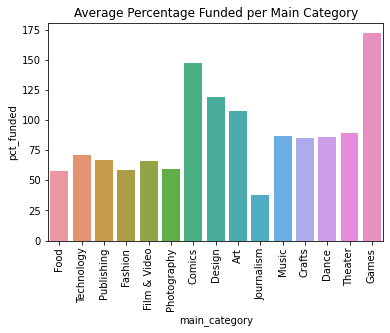

In [318]:
# visualizing Average Percentage Funded per Main Category
plt.title("Average Percentage Funded per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["pct_funded"], ci = None)

In [319]:
## averages of all numeric variables grouped by state (groupby)
df3["length_days"].groupby(df3["state"]).mean()

#shorter projects more successful

state
failed        34.549726
successful    31.606562
Name: length_days, dtype: float64

In [320]:
df3["usd_pledged"].groupby(df3["state"]).mean()

state
failed         1222.796123
successful    10590.371558
Name: usd_pledged, dtype: float64

In [321]:
df3["goal"].groupby(df3["state"]).mean()

#lower goal more successful

state
failed        30829.701792
successful     7856.602543
Name: goal, dtype: float64

<AxesSubplot:xlabel='state', ylabel='goal'>

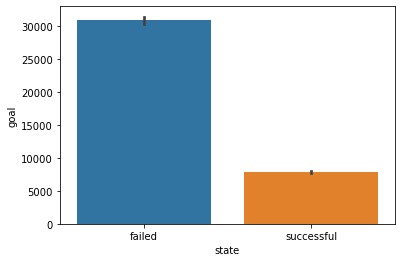

In [322]:
#visualization of goal by state

sns.barplot(data = df3, x = "state", y = "goal")

In [323]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         15.943553
successful    137.724173
Name: backers, dtype: float64

In [324]:
df3["pct_funded"].groupby(df3["state"]).mean()

state
failed          8.905822
successful    205.696802
Name: pct_funded, dtype: float64

In [325]:
df3["avg_pledge_per_backer"].groupby(df3["state"]).mean()

state
failed              NaN
successful    84.525031
Name: avg_pledge_per_backer, dtype: float64

In [326]:
df3.describe()

,length_days,goal,backers,pct_funded,usd_pledged,avg_pledge_per_backer
count,275010.000000,2.750100e+05,275010.000000,275010.000000,275010.000000,2.421910e+05
mean,33.385346,2.174104e+04,64.122643,86.760658,4928.814840,inf
std,11.712871,9.614340e+04,144.779193,562.899767,13733.221987,NaN
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.000000e+00
25%,30.000000,2.000000e+03,2.000000,0.555556,36.000000,2.360898e+01
50%,30.000000,5.000000e+03,14.000000,15.785250,660.000000,4.633333e+01
75%,35.000000,1.500000e+04,59.000000,107.300000,3900.000000,8.086296e+01
max,72.000000,3.141592e+06,1422.000000,54575.666667,268654.025500,inf


# BINNING

In [327]:
# create bins for number of backers

bins = [0, 5, 15, 30, 60, 100, 1500]
bin_labels = ["0-4", "5-14", "15-29", "30-59", "60-99", "100-1500"]

df3["backers_group"] = pd.cut(df3["backers"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,46,failed,29.016752,3984.000000,86.608696,30-59
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,31,failed,2.082379,1561.784015,50.380130,30-59
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,46,failed,27.682680,4152.402045,90.269610,30-59
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,6,failed,0.097178,19.435528,3.239255,5-14
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,29,failed,14.540383,2908.076574,100.278503,15-29


In [460]:
# create bins for usd pledged

bins = [0, 100, 1000, 5000, 100000, 300000]
bin_labels = ["0-99", "100-999", "1,000-4,999", "5,000-99,999", "100,000-300,000"]

df3["usd_pledged_group"] = pd.cut(df3["usd_pledged"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,goal_group,length_days_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,46,failed,29.016752,3984.000000,86.608696,30-59,"1,000-4,999",15-89,"5,000-14,999",15-29
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,31,failed,2.082379,1561.784015,50.380130,30-59,"1,000-4,999",1-14,"30,000+",30-59
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,46,failed,27.682680,4152.402045,90.269610,30-59,"1,000-4,999",15-89,"5,000-14,999",15-29
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,6,failed,0.097178,19.435528,3.239255,5-14,0-99,0-0.9,"15,000-30,000",15-29
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,29,failed,14.540383,2908.076574,100.278503,15-29,"1,000-4,999",1-14,"15,000-30,000",30-59


In [329]:
# create bins for pct_funded

bins = [0, 1, 15, 90, 100, 110, 55000]
bin_labels = ["0-0.9", "1-14", "15-89", "90-99", "100-109", "110+"]

df3["pct_funded_group"] = pd.cut(df3["pct_funded"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,46,failed,29.016752,3984.000000,86.608696,30-59,"2,000-4,999",15-89
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,31,failed,2.082379,1561.784015,50.380130,30-59,"1000-1,999",1-14
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,46,failed,27.682680,4152.402045,90.269610,30-59,"2,000-4,999",15-89
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,6,failed,0.097178,19.435528,3.239255,5-14,0-49,0-0.9
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,29,failed,14.540383,2908.076574,100.278503,15-29,"2,000-4,999",1-14


In [331]:
# create bins for length_days

bins = [0, 15, 30, 60, 101]
bin_labels = ["0-14", "15-29", "30-59", "60-100"]

df3["length_days_group"] = pd.cut(df3["length_days"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,goal_group,length_days_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,46,failed,29.016752,3984.000000,86.608696,30-59,"2,000-4,999",15-89,"5,000-14,999",15-29
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,31,failed,2.082379,1561.784015,50.380130,30-59,"1000-1,999",1-14,"30,000+",30-59
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,46,failed,27.682680,4152.402045,90.269610,30-59,"2,000-4,999",15-89,"5,000-14,999",15-29
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,6,failed,0.097178,19.435528,3.239255,5-14,0-49,0-0.9,"15,000-30,000",15-29
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,29,failed,14.540383,2908.076574,100.278503,15-29,"2,000-4,999",1-14,"15,000-30,000",30-59


In [491]:
# create bins for goal

bins = [0, 2000, 5000, 15000, 30000, 10000000]
bin_labels = ["0-1,999", "2,000-4,999", "5,000-14,999", "15,000-29,999", "30,000+"]

df3["goal_group"] = pd.cut(df3["goal"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,goal_group,length_days_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,46,failed,29.016752,3984.000000,86.608696,30-59,"1,000-4,999",15-89,"5,000-14,999",15-29
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,31,failed,2.082379,1561.784015,50.380130,30-59,"1,000-4,999",1-14,"30,000+",30-59
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,46,failed,27.682680,4152.402045,90.269610,30-59,"1,000-4,999",15-89,"5,000-14,999",15-29
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,6,failed,0.097178,19.435528,3.239255,5-14,0-99,0-0.9,"15,000-29,999",15-29
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,29,failed,14.540383,2908.076574,100.278503,15-29,"1,000-4,999",1-14,"15,000-29,999",30-59


# Visuals with Bins

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='main_category', ylabel='usd_pledged'>

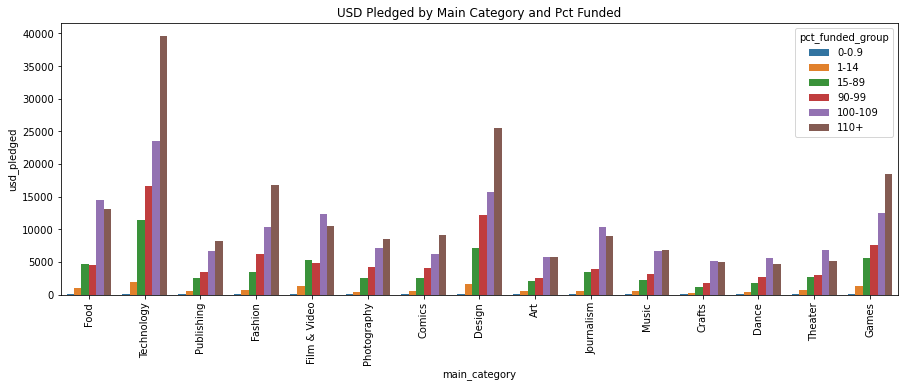

In [332]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["pct_funded_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Backers'}, xlabel='main_category', ylabel='usd_pledged'>

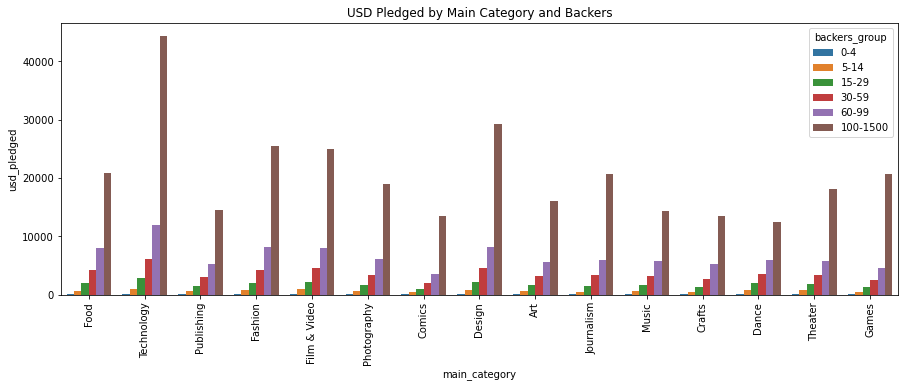

In [333]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Backers")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["backers_group"], ci=None)

<AxesSubplot:title={'center':'Pct Funded by Main Category and USD Pledged Group'}, xlabel='main_category', ylabel='pct_funded'>

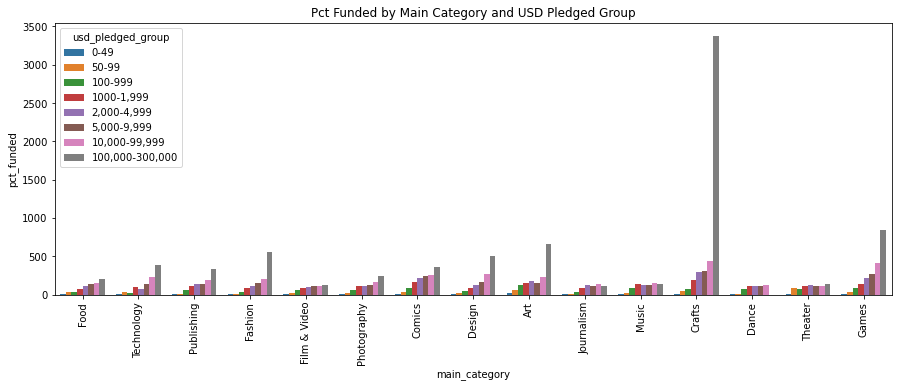

In [334]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Pct Funded by Main Category and USD Pledged Group")
sns.barplot(x=df3["main_category"], y = df3["pct_funded"], hue = df3["usd_pledged_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='pct_funded_group', ylabel='usd_pledged'>

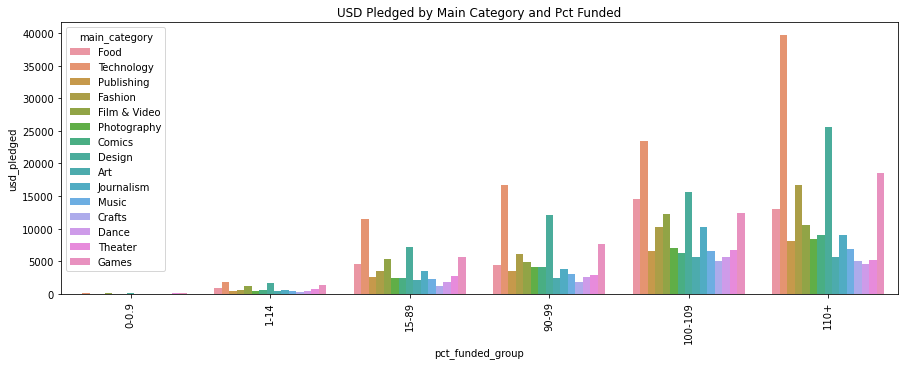

In [335]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["pct_funded_group"], y = df3["usd_pledged"], hue = df3["main_category"], ci=None)

<AxesSubplot:title={'center':'Average Goal by Main Category and State'}, xlabel='main_category', ylabel='goal'>

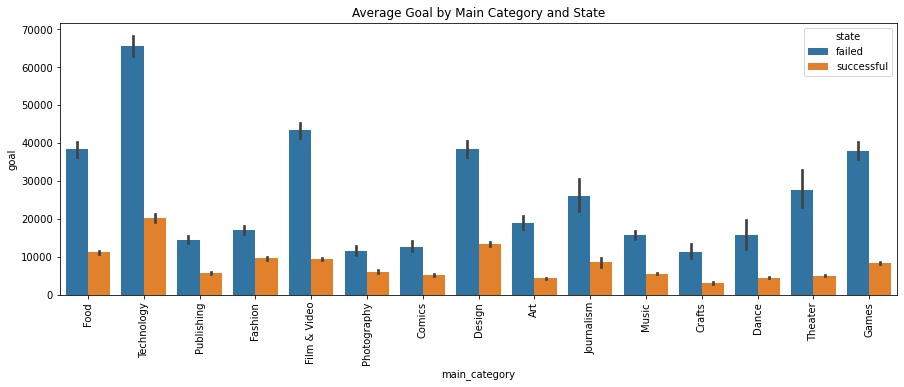

In [338]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Goal by Main Category and State")
sns.barplot(data = df3, x="main_category", y= "goal", hue = "state")

# Creating Datasets of Sub-Groups (Numerical Groupings)

### Backers Groups: 
- 1: 0-4      68,698 rows
- 2: 5-14     39,091 rows
- 3: 15-29    31,590 rows
- 4: 30-59    35,166 rows
- 5: 60-99    23,892 rows
- 6: 100-1500 43,736 rows

In [415]:
df3_backers_1 = df3.copy()
df3_backers_1["Backers_0-4"] = np.where(df3["backers_group"]=="0-4", "Y", "N")
df3_backers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [417]:
df3_backers_1.drop(df3_backers_1.loc[df3_backers_1["Backers_0-4"]=="N"].index, inplace = True)
df3_backers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68698 entries, 6 to 281851
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   68698 non-null  object        
 1   main_category          68698 non-null  object        
 2   category               68698 non-null  object        
 3   country                68698 non-null  object        
 4   currency               68698 non-null  object        
 5   launched               68698 non-null  datetime64[ns]
 6   deadline               68698 non-null  datetime64[ns]
 7   length_days            68698 non-null  int64         
 8   goal                   68698 non-null  float64       
 9   backers                68698 non-null  int64         
 10  state                  68698 non-null  object        
 11  pct_funded             68698 non-null  float64       
 12  usd_pledged            68698 non-null  float64       
 13  

In [418]:
df3_backers_2 = df3.copy()
df3_backers_2["Backers_5-14"] = np.where(df3_backers_2["backers_group"]=="5-14", "Y", "N")

In [419]:
df3_backers_2.drop(df3_backers_2.loc[df3_backers_2["Backers_5-14"]=="N"].index, inplace = True)
df3_backers_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39091 entries, 3 to 281853
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   39091 non-null  object        
 1   main_category          39091 non-null  object        
 2   category               39091 non-null  object        
 3   country                39091 non-null  object        
 4   currency               39091 non-null  object        
 5   launched               39091 non-null  datetime64[ns]
 6   deadline               39091 non-null  datetime64[ns]
 7   length_days            39091 non-null  int64         
 8   goal                   39091 non-null  float64       
 9   backers                39091 non-null  int64         
 10  state                  39091 non-null  object        
 11  pct_funded             39091 non-null  float64       
 12  usd_pledged            39091 non-null  float64       
 13  

In [420]:
df3_backers_3 = df3.copy()
df3_backers_3["Backers_15-29"] = np.where(df3_backers_3["backers_group"]=="15-29", "Y", "N")

In [421]:
df3_backers_3.drop(df3_backers_3.loc[df3_backers_3["Backers_15-29"]=="N"].index, inplace = True)
df3_backers_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31590 entries, 4 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   31590 non-null  object        
 1   main_category          31590 non-null  object        
 2   category               31590 non-null  object        
 3   country                31590 non-null  object        
 4   currency               31590 non-null  object        
 5   launched               31590 non-null  datetime64[ns]
 6   deadline               31590 non-null  datetime64[ns]
 7   length_days            31590 non-null  int64         
 8   goal                   31590 non-null  float64       
 9   backers                31590 non-null  int64         
 10  state                  31590 non-null  object        
 11  pct_funded             31590 non-null  float64       
 12  usd_pledged            31590 non-null  float64       
 13  

In [422]:
df3_backers_4 = df3.copy()
df3_backers_4["Backers_30-59"] = np.where(df3_backers_4["backers_group"]=="30-59", "Y", "N")

In [423]:
df3_backers_4.drop(df3_backers_4.loc[df3_backers_4["Backers_30-59"]=="N"].index, inplace = True)
df3_backers_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35166 entries, 0 to 281840
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   35166 non-null  object        
 1   main_category          35166 non-null  object        
 2   category               35166 non-null  object        
 3   country                35166 non-null  object        
 4   currency               35166 non-null  object        
 5   launched               35166 non-null  datetime64[ns]
 6   deadline               35166 non-null  datetime64[ns]
 7   length_days            35166 non-null  int64         
 8   goal                   35166 non-null  float64       
 9   backers                35166 non-null  int64         
 10  state                  35166 non-null  object        
 11  pct_funded             35166 non-null  float64       
 12  usd_pledged            35166 non-null  float64       
 13  

In [424]:
df3_backers_5 = df3.copy()
df3_backers_5["Backers_60-99"] = np.where(df3_backers_5["backers_group"]=="60-99", "Y", "N")

In [425]:
df3_backers_5.drop(df3_backers_5.loc[df3_backers_5["Backers_60-99"]=="N"].index, inplace = True)
df3_backers_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23892 entries, 10 to 281846
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   23892 non-null  object        
 1   main_category          23892 non-null  object        
 2   category               23892 non-null  object        
 3   country                23892 non-null  object        
 4   currency               23892 non-null  object        
 5   launched               23892 non-null  datetime64[ns]
 6   deadline               23892 non-null  datetime64[ns]
 7   length_days            23892 non-null  int64         
 8   goal                   23892 non-null  float64       
 9   backers                23892 non-null  int64         
 10  state                  23892 non-null  object        
 11  pct_funded             23892 non-null  float64       
 12  usd_pledged            23892 non-null  float64       
 13 

In [426]:
df3_backers_6 = df3.copy()
df3_backers_6["Backers_100-1500"] = np.where(df3_backers_6["backers_group"]=="100-1500", "Y", "N")

In [427]:
df3_backers_6.drop(df3_backers_6.loc[df3_backers_6["Backers_100-1500"]=="N"].index, inplace = True)
df3_backers_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43736 entries, 8 to 281854
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   43736 non-null  object        
 1   main_category          43736 non-null  object        
 2   category               43736 non-null  object        
 3   country                43736 non-null  object        
 4   currency               43736 non-null  object        
 5   launched               43736 non-null  datetime64[ns]
 6   deadline               43736 non-null  datetime64[ns]
 7   length_days            43736 non-null  int64         
 8   goal                   43736 non-null  float64       
 9   backers                43736 non-null  int64         
 10  state                  43736 non-null  object        
 11  pct_funded             43736 non-null  float64       
 12  usd_pledged            43736 non-null  float64       
 13  

### USD Pledged Groups: 
- df3_usd_pledged_1: 0-99               50,919 rows
- df3_usd_pledged_2: 100-999            62,956 rows
- df3_usd_pledged_3: 1,000-4,999        64,278 rows
- df3_usd_pledged_4: 5,000-99,999       58,575 rows
- df3_usd_pledged_5: 100,000-300,000    3,219 rows

In [450]:
df3_usd_pledged_1 = df3.copy()
df3_usd_pledged_1["USD_Pledged_0-99"] = np.where(df3_usd_pledged_1["usd_pledged_group"]=="0-99", "Y", "N")

In [451]:
df3_usd_pledged_1.drop(df3_usd_pledged_1.loc[df3_usd_pledged_1["USD_Pledged_0-99"]=="N"].index, inplace = True)
df3_usd_pledged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50919 entries, 3 to 281832
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   50919 non-null  object        
 1   main_category          50919 non-null  object        
 2   category               50919 non-null  object        
 3   country                50919 non-null  object        
 4   currency               50919 non-null  object        
 5   launched               50919 non-null  datetime64[ns]
 6   deadline               50919 non-null  datetime64[ns]
 7   length_days            50919 non-null  int64         
 8   goal                   50919 non-null  float64       
 9   backers                50919 non-null  int64         
 10  state                  50919 non-null  object        
 11  pct_funded             50919 non-null  float64       
 12  usd_pledged            50919 non-null  float64       
 13  

In [453]:
df3_usd_pledged_2 = df3.copy()
df3_usd_pledged_2["USD_Pledged_100-999"] = np.where(df3_usd_pledged_2["usd_pledged_group"]=="100-999", "Y", "N")

In [454]:
df3_usd_pledged_2.drop(df3_usd_pledged_2.loc[df3_usd_pledged_2["USD_Pledged_100-999"]=="N"].index, inplace = True)
df3_usd_pledged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62956 entries, 5 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   62956 non-null  object        
 1   main_category          62956 non-null  object        
 2   category               62956 non-null  object        
 3   country                62956 non-null  object        
 4   currency               62956 non-null  object        
 5   launched               62956 non-null  datetime64[ns]
 6   deadline               62956 non-null  datetime64[ns]
 7   length_days            62956 non-null  int64         
 8   goal                   62956 non-null  float64       
 9   backers                62956 non-null  int64         
 10  state                  62956 non-null  object        
 11  pct_funded             62956 non-null  float64       
 12  usd_pledged            62956 non-null  float64       
 13  

In [455]:
df3_usd_pledged_3 = df3.copy()
df3_usd_pledged_3["USD_Pledged_1,000-4,999"] = np.where(df3_usd_pledged_3["usd_pledged_group"]=="1,000-4,999", "Y", "N")

In [456]:
df3_usd_pledged_3.drop(df3_usd_pledged_3.loc[df3_usd_pledged_3["USD_Pledged_1,000-4,999"]=="N"].index, inplace = True)
df3_usd_pledged_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64278 entries, 0 to 281846
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     64278 non-null  object        
 1   main_category            64278 non-null  object        
 2   category                 64278 non-null  object        
 3   country                  64278 non-null  object        
 4   currency                 64278 non-null  object        
 5   launched                 64278 non-null  datetime64[ns]
 6   deadline                 64278 non-null  datetime64[ns]
 7   length_days              64278 non-null  int64         
 8   goal                     64278 non-null  float64       
 9   backers                  64278 non-null  int64         
 10  state                    64278 non-null  object        
 11  pct_funded               64278 non-null  float64       
 12  usd_pledged              64278 

In [461]:
df3_usd_pledged_4 = df3.copy()
df3_usd_pledged_4["USD_Pledged_5,000-99,999"] = np.where(df3_usd_pledged_4["usd_pledged_group"]=="5,000-99,999", "Y", "N")

In [462]:
df3_usd_pledged_4.drop(df3_usd_pledged_4.loc[df3_usd_pledged_4["USD_Pledged_5,000-99,999"]=="N"].index, inplace = True)
df3_usd_pledged_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58575 entries, 7 to 281854
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      58575 non-null  object        
 1   main_category             58575 non-null  object        
 2   category                  58575 non-null  object        
 3   country                   58575 non-null  object        
 4   currency                  58575 non-null  object        
 5   launched                  58575 non-null  datetime64[ns]
 6   deadline                  58575 non-null  datetime64[ns]
 7   length_days               58575 non-null  int64         
 8   goal                      58575 non-null  float64       
 9   backers                   58575 non-null  int64         
 10  state                     58575 non-null  object        
 11  pct_funded                58575 non-null  float64       
 12  usd_pledged      

In [463]:
df3_usd_pledged_5 = df3.copy()
df3_usd_pledged_5["USD_Pledged_100,000-300,000"] = np.where(df3_usd_pledged_5["usd_pledged_group"]=="100,000-300,000", "Y", "N")

In [464]:
df3_usd_pledged_5.drop(df3_usd_pledged_5.loc[df3_usd_pledged_5["USD_Pledged_100,000-300,000"]=="N"].index, inplace = True)
df3_usd_pledged_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 8 to 278144
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   name                         1219 non-null   object        
 1   main_category                1219 non-null   object        
 2   category                     1219 non-null   object        
 3   country                      1219 non-null   object        
 4   currency                     1219 non-null   object        
 5   launched                     1219 non-null   datetime64[ns]
 6   deadline                     1219 non-null   datetime64[ns]
 7   length_days                  1219 non-null   int64         
 8   goal                         1219 non-null   float64       
 9   backers                      1219 non-null   int64         
 10  state                        1219 non-null   object        
 11  pct_funded                   1219 non-nul

### Pct Funded Groups: 
- df3_pct_funded_1: 0-0.9           40,375 rows
- df3_pct_funded_2: 1-14            58,658 rows
- df3_pct_funded_3: 15-89           37,368 rows
- df3_pct_funded_4: 90-99            3,925 rows
- df3_pct_funded_5: 100-109         34,727 rows
- df3_pct_funded_6: 110+            62,894 rows

In [470]:
df3_pct_funded_1 = df3.copy()
df3_pct_funded_1["Pct_Funded_0-0.9"] = np.where(df3_pct_funded_1["pct_funded_group"]=="0-0.9", "Y", "N")

In [471]:
df3_pct_funded_1.drop(df3_pct_funded_1.loc[df3_pct_funded_1["Pct_Funded_0-0.9"]=="N"].index, inplace = True)
df3_pct_funded_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40375 entries, 3 to 281853
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   40375 non-null  object        
 1   main_category          40375 non-null  object        
 2   category               40375 non-null  object        
 3   country                40375 non-null  object        
 4   currency               40375 non-null  object        
 5   launched               40375 non-null  datetime64[ns]
 6   deadline               40375 non-null  datetime64[ns]
 7   length_days            40375 non-null  int64         
 8   goal                   40375 non-null  float64       
 9   backers                40375 non-null  int64         
 10  state                  40375 non-null  object        
 11  pct_funded             40375 non-null  float64       
 12  usd_pledged            40375 non-null  float64       
 13  

In [472]:
df3_pct_funded_2 = df3.copy()
df3_pct_funded_2["Pct_Funded_1-14"] = np.where(df3_pct_funded_2["pct_funded_group"]=="1-14", "Y", "N")

In [473]:
df3_pct_funded_2.drop(df3_pct_funded_2.loc[df3_pct_funded_2["Pct_Funded_1-14"]=="N"].index, inplace = True)
df3_pct_funded_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58658 entries, 1 to 281849
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   58658 non-null  object        
 1   main_category          58658 non-null  object        
 2   category               58658 non-null  object        
 3   country                58658 non-null  object        
 4   currency               58658 non-null  object        
 5   launched               58658 non-null  datetime64[ns]
 6   deadline               58658 non-null  datetime64[ns]
 7   length_days            58658 non-null  int64         
 8   goal                   58658 non-null  float64       
 9   backers                58658 non-null  int64         
 10  state                  58658 non-null  object        
 11  pct_funded             58658 non-null  float64       
 12  usd_pledged            58658 non-null  float64       
 13  

In [474]:
df3_pct_funded_3 = df3.copy()
df3_pct_funded_3["Pct_Funded_15-89"] = np.where(df3_pct_funded_3["pct_funded_group"]=="15-89", "Y", "N")

In [475]:
df3_pct_funded_3.drop(df3_pct_funded_3.loc[df3_pct_funded_3["Pct_Funded_15-89"]=="N"].index, inplace = True)
df3_pct_funded_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37368 entries, 0 to 281851
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   37368 non-null  object        
 1   main_category          37368 non-null  object        
 2   category               37368 non-null  object        
 3   country                37368 non-null  object        
 4   currency               37368 non-null  object        
 5   launched               37368 non-null  datetime64[ns]
 6   deadline               37368 non-null  datetime64[ns]
 7   length_days            37368 non-null  int64         
 8   goal                   37368 non-null  float64       
 9   backers                37368 non-null  int64         
 10  state                  37368 non-null  object        
 11  pct_funded             37368 non-null  float64       
 12  usd_pledged            37368 non-null  float64       
 13  

In [476]:
df3_pct_funded_4 = df3.copy()
df3_pct_funded_4["Pct_Funded_90-99"] = np.where(df3_pct_funded_4["pct_funded_group"]=="90-99", "Y", "N")

In [477]:
df3_pct_funded_4.drop(df3_pct_funded_4.loc[df3_pct_funded_4["Pct_Funded_90-99"]=="N"].index, inplace = True)
df3_pct_funded_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3925 entries, 13 to 281836
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   3925 non-null   object        
 1   main_category          3925 non-null   object        
 2   category               3925 non-null   object        
 3   country                3925 non-null   object        
 4   currency               3925 non-null   object        
 5   launched               3925 non-null   datetime64[ns]
 6   deadline               3925 non-null   datetime64[ns]
 7   length_days            3925 non-null   int64         
 8   goal                   3925 non-null   float64       
 9   backers                3925 non-null   int64         
 10  state                  3925 non-null   object        
 11  pct_funded             3925 non-null   float64       
 12  usd_pledged            3925 non-null   float64       
 13  

In [478]:
df3_pct_funded_5 = df3.copy()
df3_pct_funded_5["Pct_Funded_100-109"] = np.where(df3_pct_funded_5["pct_funded_group"]=="100-109", "Y", "N")

In [479]:
df3_pct_funded_5.drop(df3_pct_funded_5.loc[df3_pct_funded_5["Pct_Funded_100-109"]=="N"].index, inplace = True)
df3_pct_funded_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34727 entries, 18 to 281854
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   34727 non-null  object        
 1   main_category          34727 non-null  object        
 2   category               34727 non-null  object        
 3   country                34727 non-null  object        
 4   currency               34727 non-null  object        
 5   launched               34727 non-null  datetime64[ns]
 6   deadline               34727 non-null  datetime64[ns]
 7   length_days            34727 non-null  int64         
 8   goal                   34727 non-null  float64       
 9   backers                34727 non-null  int64         
 10  state                  34727 non-null  object        
 11  pct_funded             34727 non-null  float64       
 12  usd_pledged            34727 non-null  float64       
 13 

In [480]:
df3_pct_funded_6 = df3.copy()
df3_pct_funded_6["Pct_Funded_110+"] = np.where(df3_pct_funded_6["pct_funded_group"]=="110+", "Y", "N")

In [481]:
df3_pct_funded_6.drop(df3_pct_funded_6.loc[df3_pct_funded_6["Pct_Funded_110+"]=="N"].index, inplace = True)
df3_pct_funded_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62894 entries, 8 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   62894 non-null  object        
 1   main_category          62894 non-null  object        
 2   category               62894 non-null  object        
 3   country                62894 non-null  object        
 4   currency               62894 non-null  object        
 5   launched               62894 non-null  datetime64[ns]
 6   deadline               62894 non-null  datetime64[ns]
 7   length_days            62894 non-null  int64         
 8   goal                   62894 non-null  float64       
 9   backers                62894 non-null  int64         
 10  state                  62894 non-null  object        
 11  pct_funded             62894 non-null  float64       
 12  usd_pledged            62894 non-null  float64       
 13  

### Length Days Groups: 
- df3_length_days_1: 0-14            14,455 rows
- df3_length_days_2: 15-29          166,794 rows
- df3_length_days_3: 30-59           92,244 rows
- df3_length_days_4: 60-100           1,517 rows

In [482]:
df3_length_days_1 = df3.copy()
df3_length_days_1["Length_Days_0-14"] = np.where(df3_length_days_1["length_days_group"]=="0-14", "Y", "N")

In [484]:
df3_length_days_1.drop(df3_length_days_1.loc[df3_length_days_1["Length_Days_0-14"]=="N"].index, inplace = True)
df3_length_days_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14455 entries, 48 to 281839
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   14455 non-null  object        
 1   main_category          14455 non-null  object        
 2   category               14455 non-null  object        
 3   country                14455 non-null  object        
 4   currency               14455 non-null  object        
 5   launched               14455 non-null  datetime64[ns]
 6   deadline               14455 non-null  datetime64[ns]
 7   length_days            14455 non-null  int64         
 8   goal                   14455 non-null  float64       
 9   backers                14455 non-null  int64         
 10  state                  14455 non-null  object        
 11  pct_funded             14455 non-null  float64       
 12  usd_pledged            14455 non-null  float64       
 13 

In [485]:
df3_length_days_2 = df3.copy()
df3_length_days_2["Length_Days_15-29"] = np.where(df3_length_days_2["length_days_group"]=="15-29", "Y", "N")

In [486]:
df3_length_days_2.drop(df3_length_days_2.loc[df3_length_days_2["Length_Days_15-29"]=="N"].index, inplace = True)
df3_length_days_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166794 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   166794 non-null  object        
 1   main_category          166794 non-null  object        
 2   category               166794 non-null  object        
 3   country                166794 non-null  object        
 4   currency               166794 non-null  object        
 5   launched               166794 non-null  datetime64[ns]
 6   deadline               166794 non-null  datetime64[ns]
 7   length_days            166794 non-null  int64         
 8   goal                   166794 non-null  float64       
 9   backers                166794 non-null  int64         
 10  state                  166794 non-null  object        
 11  pct_funded             166794 non-null  float64       
 12  usd_pledged            166794 non-null  floa

In [487]:
df3_length_days_3 = df3.copy()
df3_length_days_3["Length_Days_30-59"] = np.where(df3_length_days_3["length_days_group"]=="30-59", "Y", "N")

In [488]:
df3_length_days_3.drop(df3_length_days_3.loc[df3_length_days_3["Length_Days_30-59"]=="N"].index, inplace = True)
df3_length_days_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92244 entries, 1 to 281854
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   92244 non-null  object        
 1   main_category          92244 non-null  object        
 2   category               92244 non-null  object        
 3   country                92244 non-null  object        
 4   currency               92244 non-null  object        
 5   launched               92244 non-null  datetime64[ns]
 6   deadline               92244 non-null  datetime64[ns]
 7   length_days            92244 non-null  int64         
 8   goal                   92244 non-null  float64       
 9   backers                92244 non-null  int64         
 10  state                  92244 non-null  object        
 11  pct_funded             92244 non-null  float64       
 12  usd_pledged            92244 non-null  float64       
 13  

In [489]:
df3_length_days_4 = df3.copy()
df3_length_days_4["Length_Days_60-100"] = np.where(df3_length_days_4["length_days_group"]=="60-100", "Y", "N")

In [490]:
df3_length_days_4.drop(df3_length_days_4.loc[df3_length_days_4["Length_Days_60-100"]=="N"].index, inplace = True)
df3_length_days_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 3906 to 280976
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   1517 non-null   object        
 1   main_category          1517 non-null   object        
 2   category               1517 non-null   object        
 3   country                1517 non-null   object        
 4   currency               1517 non-null   object        
 5   launched               1517 non-null   datetime64[ns]
 6   deadline               1517 non-null   datetime64[ns]
 7   length_days            1517 non-null   int64         
 8   goal                   1517 non-null   float64       
 9   backers                1517 non-null   int64         
 10  state                  1517 non-null   object        
 11  pct_funded             1517 non-null   float64       
 12  usd_pledged            1517 non-null   float64       
 13

### Goal Groups: 
- df3_goal_1: 0-1,999           76,693 rows
- df3_goal_2: 2,000-4,999       67,004 rows
- df3_goal_3: 5,000-14,999      68,732 rows
- df3_goal_4: 15,000-29,999     30,275 rows
- df3_goal_5: 30,000+           32,306 rows

In [492]:
df3_goal_1 = df3.copy()
df3_goal_1["Goal_0-1,999"] = np.where(df3_goal_1["goal_group"]=="0-1,999", "Y", "N")

In [493]:
df3_goal_1.drop(df3_goal_1.loc[df3_goal_1["Goal_0-1,999"]=="N"].index, inplace = True)
df3_goal_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76693 entries, 9 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   76693 non-null  object        
 1   main_category          76693 non-null  object        
 2   category               76693 non-null  object        
 3   country                76693 non-null  object        
 4   currency               76693 non-null  object        
 5   launched               76693 non-null  datetime64[ns]
 6   deadline               76693 non-null  datetime64[ns]
 7   length_days            76693 non-null  int64         
 8   goal                   76693 non-null  float64       
 9   backers                76693 non-null  int64         
 10  state                  76693 non-null  object        
 11  pct_funded             76693 non-null  float64       
 12  usd_pledged            76693 non-null  float64       
 13  

In [494]:
df3_goal_2 = df3.copy()
df3_goal_2["Goal_2,000-4,999"] = np.where(df3_goal_2["goal_group"]=="2,000-4,999", "Y", "N")

In [495]:
df3_goal_2.drop(df3_goal_2.loc[df3_goal_2["Goal_2,000-4,999"]=="N"].index, inplace = True)
df3_goal_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67004 entries, 6 to 281854
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   67004 non-null  object        
 1   main_category          67004 non-null  object        
 2   category               67004 non-null  object        
 3   country                67004 non-null  object        
 4   currency               67004 non-null  object        
 5   launched               67004 non-null  datetime64[ns]
 6   deadline               67004 non-null  datetime64[ns]
 7   length_days            67004 non-null  int64         
 8   goal                   67004 non-null  float64       
 9   backers                67004 non-null  int64         
 10  state                  67004 non-null  object        
 11  pct_funded             67004 non-null  float64       
 12  usd_pledged            67004 non-null  float64       
 13  

In [496]:
df3_goal_3 = df3.copy()
df3_goal_3["Goal_5,000-14,999"] = np.where(df3_goal_3["goal_group"]=="5,000-14,999", "Y", "N")

In [497]:
df3_goal_3.drop(df3_goal_3.loc[df3_goal_3["Goal_5,000-14,999"]=="N"].index, inplace = True)
df3_goal_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68732 entries, 0 to 281852
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   68732 non-null  object        
 1   main_category          68732 non-null  object        
 2   category               68732 non-null  object        
 3   country                68732 non-null  object        
 4   currency               68732 non-null  object        
 5   launched               68732 non-null  datetime64[ns]
 6   deadline               68732 non-null  datetime64[ns]
 7   length_days            68732 non-null  int64         
 8   goal                   68732 non-null  float64       
 9   backers                68732 non-null  int64         
 10  state                  68732 non-null  object        
 11  pct_funded             68732 non-null  float64       
 12  usd_pledged            68732 non-null  float64       
 13  

In [498]:
df3_goal_4 = df3.copy()
df3_goal_4["Goal_15,000-29,999"] = np.where(df3_goal_4["goal_group"]=="15,000-29,999", "Y", "N")

In [499]:
df3_goal_4.drop(df3_goal_4.loc[df3_goal_4["Goal_15,000-29,999"]=="N"].index, inplace = True)
df3_goal_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30275 entries, 3 to 281848
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   30275 non-null  object        
 1   main_category          30275 non-null  object        
 2   category               30275 non-null  object        
 3   country                30275 non-null  object        
 4   currency               30275 non-null  object        
 5   launched               30275 non-null  datetime64[ns]
 6   deadline               30275 non-null  datetime64[ns]
 7   length_days            30275 non-null  int64         
 8   goal                   30275 non-null  float64       
 9   backers                30275 non-null  int64         
 10  state                  30275 non-null  object        
 11  pct_funded             30275 non-null  float64       
 12  usd_pledged            30275 non-null  float64       
 13  

In [500]:
df3_goal_5 = df3.copy()
df3_goal_5["Goal_30,000+"] = np.where(df3_goal_5["goal_group"]=="30,000+", "Y", "N")

In [501]:
df3_goal_5.drop(df3_goal_5.loc[df3_goal_5["Goal_30,000+"]=="N"].index, inplace = True)
df3_goal_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32306 entries, 1 to 281853
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   32306 non-null  object        
 1   main_category          32306 non-null  object        
 2   category               32306 non-null  object        
 3   country                32306 non-null  object        
 4   currency               32306 non-null  object        
 5   launched               32306 non-null  datetime64[ns]
 6   deadline               32306 non-null  datetime64[ns]
 7   length_days            32306 non-null  int64         
 8   goal                   32306 non-null  float64       
 9   backers                32306 non-null  int64         
 10  state                  32306 non-null  object        
 11  pct_funded             32306 non-null  float64       
 12  usd_pledged            32306 non-null  float64       
 13  

# Correlations in Sub-Groups (Numerical Groupings)

# Creating Datasets of Sub-Groups (Main Categories)

In [339]:
# for sub-group analysis creating a dataset with main category = food only

df3_food = df3.copy()

In [340]:
df3_food["Food Main Category"] = np.where(df3["main_category"]=="Food", "Y", "N")
df3_food.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,goal_group,length_days_group,Food Main Category
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,46,failed,29.016752,3984.000000,86.608696,30-59,"2,000-4,999",15-89,"5,000-14,999",15-29,Y
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,31,failed,2.082379,1561.784015,50.380130,30-59,"1000-1,999",1-14,"30,000+",30-59,N
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,46,failed,27.682680,4152.402045,90.269610,30-59,"2,000-4,999",15-89,"5,000-14,999",15-29,N
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,6,failed,0.097178,19.435528,3.239255,5-14,0-49,0-0.9,"15,000-30,000",15-29,N
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,29,failed,14.540383,2908.076574,100.278503,15-29,"2,000-4,999",1-14,"15,000-30,000",30-59,N


In [341]:
df3_food.drop(df3_food.loc[df3_food["Food Main Category"]=="N"].index, inplace = True)

In [342]:
df3_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18770 entries, 0 to 260615
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18770 non-null  object        
 1   main_category          18770 non-null  object        
 2   category               18770 non-null  object        
 3   country                18770 non-null  object        
 4   currency               18770 non-null  object        
 5   launched               18770 non-null  datetime64[ns]
 6   deadline               18770 non-null  datetime64[ns]
 7   length_days            18770 non-null  int64         
 8   goal                   18770 non-null  float64       
 9   backers                18770 non-null  int64         
 10  state                  18770 non-null  object        
 11  pct_funded             18770 non-null  float64       
 12  usd_pledged            18770 non-null  float64       
 13  

In [343]:
# for sub-group analysis creating a dataset with main category = techonology only

df3_tech = df3.copy()
df3_tech["Tech Main Category"] = np.where(df3["main_category"]=="Technology", "Y", "N")
df3_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [344]:
df3_tech.drop(df3_tech.loc[df3_tech["Tech Main Category"]=="N"].index, inplace = True)
df3_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20677 entries, 1 to 273153
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   20677 non-null  object        
 1   main_category          20677 non-null  object        
 2   category               20677 non-null  object        
 3   country                20677 non-null  object        
 4   currency               20677 non-null  object        
 5   launched               20677 non-null  datetime64[ns]
 6   deadline               20677 non-null  datetime64[ns]
 7   length_days            20677 non-null  int64         
 8   goal                   20677 non-null  float64       
 9   backers                20677 non-null  int64         
 10  state                  20677 non-null  object        
 11  pct_funded             20677 non-null  float64       
 12  usd_pledged            20677 non-null  float64       
 13  

In [345]:
# for sub-group analysis creating a dataset with main category = publishing only

df3_pub = df3.copy()
df3_pub["Publishing Main Category"] = np.where(df3_pub["main_category"]=="Publishing", "Y", "N")
df3_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   name                      275010 non-null  object        
 1   main_category             275010 non-null  object        
 2   category                  275010 non-null  object        
 3   country                   275010 non-null  object        
 4   currency                  275010 non-null  object        
 5   launched                  275010 non-null  datetime64[ns]
 6   deadline                  275010 non-null  datetime64[ns]
 7   length_days               275010 non-null  int64         
 8   goal                      275010 non-null  float64       
 9   backers                   275010 non-null  int64         
 10  state                     275010 non-null  object        
 11  pct_funded                275010 non-null  float64       
 12  us

In [346]:
df3_pub.drop(df3_pub.loc[df3_pub["Publishing Main Category"]=="N"].index, inplace = True)
df3_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29898 entries, 456 to 281855
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      29898 non-null  object        
 1   main_category             29898 non-null  object        
 2   category                  29898 non-null  object        
 3   country                   29898 non-null  object        
 4   currency                  29898 non-null  object        
 5   launched                  29898 non-null  datetime64[ns]
 6   deadline                  29898 non-null  datetime64[ns]
 7   length_days               29898 non-null  int64         
 8   goal                      29898 non-null  float64       
 9   backers                   29898 non-null  int64         
 10  state                     29898 non-null  object        
 11  pct_funded                29898 non-null  float64       
 12  usd_pledged    

In [347]:
# for sub-group analysis creating a dataset with main category = fashion only

df3_fash = df3.copy()
df3_fash["Fashion Main Category"] = np.where(df3_fash["main_category"]=="Fashion", "Y", "N")
df3_fash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [348]:
df3_fash.drop(df3_fash.loc[df3_fash["Fashion Main Category"]=="N"].index, inplace = True)
df3_fash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15685 entries, 1046 to 212623
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   15685 non-null  object        
 1   main_category          15685 non-null  object        
 2   category               15685 non-null  object        
 3   country                15685 non-null  object        
 4   currency               15685 non-null  object        
 5   launched               15685 non-null  datetime64[ns]
 6   deadline               15685 non-null  datetime64[ns]
 7   length_days            15685 non-null  int64         
 8   goal                   15685 non-null  float64       
 9   backers                15685 non-null  int64         
 10  state                  15685 non-null  object        
 11  pct_funded             15685 non-null  float64       
 12  usd_pledged            15685 non-null  float64       
 1

In [349]:
# for sub-group analysis creating a dataset with main category = film & video only

df3_film = df3.copy()
df3_film["Film & Video Main Category"] = np.where(df3_film["main_category"]=="Film & Video", "Y", "N")
df3_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   name                        275010 non-null  object        
 1   main_category               275010 non-null  object        
 2   category                    275010 non-null  object        
 3   country                     275010 non-null  object        
 4   currency                    275010 non-null  object        
 5   launched                    275010 non-null  datetime64[ns]
 6   deadline                    275010 non-null  datetime64[ns]
 7   length_days                 275010 non-null  int64         
 8   goal                        275010 non-null  float64       
 9   backers                     275010 non-null  int64         
 10  state                       275010 non-null  object        
 11  pct_funded                  275010 non-

In [350]:
df3_film.drop(df3_film.loc[df3_film["Film & Video Main Category"]=="N"].index, inplace = True)
df3_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49700 entries, 2784 to 278356
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        49700 non-null  object        
 1   main_category               49700 non-null  object        
 2   category                    49700 non-null  object        
 3   country                     49700 non-null  object        
 4   currency                    49700 non-null  object        
 5   launched                    49700 non-null  datetime64[ns]
 6   deadline                    49700 non-null  datetime64[ns]
 7   length_days                 49700 non-null  int64         
 8   goal                        49700 non-null  float64       
 9   backers                     49700 non-null  int64         
 10  state                       49700 non-null  object        
 11  pct_funded                  49700 non-null  float6

In [351]:
# for sub-group analysis creating a dataset with main category = photography only

df3_photo = df3.copy()
df3_photo["Photography Main Category"] = np.where(df3_photo["main_category"]=="Photography", "Y", "N")
df3_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   name                       275010 non-null  object        
 1   main_category              275010 non-null  object        
 2   category                   275010 non-null  object        
 3   country                    275010 non-null  object        
 4   currency                   275010 non-null  object        
 5   launched                   275010 non-null  datetime64[ns]
 6   deadline                   275010 non-null  datetime64[ns]
 7   length_days                275010 non-null  int64         
 8   goal                       275010 non-null  float64       
 9   backers                    275010 non-null  int64         
 10  state                      275010 non-null  object        
 11  pct_funded                 275010 non-null  float64 

In [352]:
df3_photo.drop(df3_photo.loc[df3_photo["Photography Main Category"]=="N"].index, inplace = True)
df3_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8533 entries, 3279 to 182183
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       8533 non-null   object        
 1   main_category              8533 non-null   object        
 2   category                   8533 non-null   object        
 3   country                    8533 non-null   object        
 4   currency                   8533 non-null   object        
 5   launched                   8533 non-null   datetime64[ns]
 6   deadline                   8533 non-null   datetime64[ns]
 7   length_days                8533 non-null   int64         
 8   goal                       8533 non-null   float64       
 9   backers                    8533 non-null   int64         
 10  state                      8533 non-null   object        
 11  pct_funded                 8533 non-null   float64       
 12  u

In [353]:
# for sub-group analysis creating a dataset with main category = comics only

df3_comics = df3.copy()
df3_comics["Comics Main Category"] = np.where(df3_comics["main_category"]=="Comics", "Y", "N")
df3_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [354]:
df3_comics.drop(df3_comics.loc[df3_comics["Comics Main Category"]=="N"].index, inplace = True)
df3_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7677 entries, 5443 to 273584
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   7677 non-null   object        
 1   main_category          7677 non-null   object        
 2   category               7677 non-null   object        
 3   country                7677 non-null   object        
 4   currency               7677 non-null   object        
 5   launched               7677 non-null   datetime64[ns]
 6   deadline               7677 non-null   datetime64[ns]
 7   length_days            7677 non-null   int64         
 8   goal                   7677 non-null   float64       
 9   backers                7677 non-null   int64         
 10  state                  7677 non-null   object        
 11  pct_funded             7677 non-null   float64       
 12  usd_pledged            7677 non-null   float64       
 13

In [355]:
# for sub-group analysis creating a dataset with main category = design only

df3_design = df3.copy()
df3_design["Design Main Category"] = np.where(df3_design["main_category"]=="Design", "Y", "N")
df3_design.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [356]:
df3_design.drop(df3_design.loc[df3_design["Design Main Category"]=="N"].index, inplace = True)
df3_design.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19199 entries, 14594 to 260245
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19199 non-null  object        
 1   main_category          19199 non-null  object        
 2   category               19199 non-null  object        
 3   country                19199 non-null  object        
 4   currency               19199 non-null  object        
 5   launched               19199 non-null  datetime64[ns]
 6   deadline               19199 non-null  datetime64[ns]
 7   length_days            19199 non-null  int64         
 8   goal                   19199 non-null  float64       
 9   backers                19199 non-null  int64         
 10  state                  19199 non-null  object        
 11  pct_funded             19199 non-null  float64       
 12  usd_pledged            19199 non-null  float64       
 

In [357]:
# for sub-group analysis creating a dataset with main category = art only

df3_art = df3.copy()
df3_art["Art Main Category"] = np.where(df3_art["main_category"]=="Art", "Y", "N")
df3_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [358]:
df3_art.drop(df3_art.loc[df3_art["Art Main Category"]=="N"].index, inplace = True)
df3_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21518 entries, 15125 to 261057
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   21518 non-null  object        
 1   main_category          21518 non-null  object        
 2   category               21518 non-null  object        
 3   country                21518 non-null  object        
 4   currency               21518 non-null  object        
 5   launched               21518 non-null  datetime64[ns]
 6   deadline               21518 non-null  datetime64[ns]
 7   length_days            21518 non-null  int64         
 8   goal                   21518 non-null  float64       
 9   backers                21518 non-null  int64         
 10  state                  21518 non-null  object        
 11  pct_funded             21518 non-null  float64       
 12  usd_pledged            21518 non-null  float64       
 

In [359]:
# for sub-group analysis creating a dataset with main category = journalism only

df3_journ = df3.copy()
df3_journ["Journalism Main Category"] = np.where(df3_journ["main_category"]=="Journalism", "Y", "N")
df3_journ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   name                      275010 non-null  object        
 1   main_category             275010 non-null  object        
 2   category                  275010 non-null  object        
 3   country                   275010 non-null  object        
 4   currency                  275010 non-null  object        
 5   launched                  275010 non-null  datetime64[ns]
 6   deadline                  275010 non-null  datetime64[ns]
 7   length_days               275010 non-null  int64         
 8   goal                      275010 non-null  float64       
 9   backers                   275010 non-null  int64         
 10  state                     275010 non-null  object        
 11  pct_funded                275010 non-null  float64       
 12  us

In [360]:
df3_journ.drop(df3_journ.loc[df3_journ["Journalism Main Category"]=="N"].index, inplace = True)
df3_journ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 23416 to 273155
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      3468 non-null   object        
 1   main_category             3468 non-null   object        
 2   category                  3468 non-null   object        
 3   country                   3468 non-null   object        
 4   currency                  3468 non-null   object        
 5   launched                  3468 non-null   datetime64[ns]
 6   deadline                  3468 non-null   datetime64[ns]
 7   length_days               3468 non-null   int64         
 8   goal                      3468 non-null   float64       
 9   backers                   3468 non-null   int64         
 10  state                     3468 non-null   object        
 11  pct_funded                3468 non-null   float64       
 12  usd_pledged   

In [361]:
# for sub-group analysis creating a dataset with main category = music only

df3_music = df3.copy()
df3_music["Music Main Category"] = np.where(df3_music["main_category"]=="Music", "Y", "N")
df3_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [362]:
df3_music.drop(df3_music.loc[df3_music["Music Main Category"]=="N"].index, inplace = True)
df3_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40025 entries, 23856 to 281029
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   40025 non-null  object        
 1   main_category          40025 non-null  object        
 2   category               40025 non-null  object        
 3   country                40025 non-null  object        
 4   currency               40025 non-null  object        
 5   launched               40025 non-null  datetime64[ns]
 6   deadline               40025 non-null  datetime64[ns]
 7   length_days            40025 non-null  int64         
 8   goal                   40025 non-null  float64       
 9   backers                40025 non-null  int64         
 10  state                  40025 non-null  object        
 11  pct_funded             40025 non-null  float64       
 12  usd_pledged            40025 non-null  float64       
 

In [363]:
# for sub-group analysis creating a dataset with main category = crafts only

df3_crafts = df3.copy()
df3_crafts["Crafts Main Category"] = np.where(df3_crafts["main_category"]=="Crafts", "Y", "N")
df3_crafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [364]:
df3_crafts.drop(df3_crafts.loc[df3_crafts["Crafts Main Category"]=="N"].index, inplace = True)
df3_crafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6289 entries, 24505 to 279198
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   6289 non-null   object        
 1   main_category          6289 non-null   object        
 2   category               6289 non-null   object        
 3   country                6289 non-null   object        
 4   currency               6289 non-null   object        
 5   launched               6289 non-null   datetime64[ns]
 6   deadline               6289 non-null   datetime64[ns]
 7   length_days            6289 non-null   int64         
 8   goal                   6289 non-null   float64       
 9   backers                6289 non-null   int64         
 10  state                  6289 non-null   object        
 11  pct_funded             6289 non-null   float64       
 12  usd_pledged            6289 non-null   float64       
 1

In [365]:
# for sub-group analysis creating a dataset with main category = dance only

df3_dance = df3.copy()
df3_dance["Dance Main Category"] = np.where(df3_dance["main_category"]=="Dance", "Y", "N")
df3_dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [366]:
df3_dance.drop(df3_dance.loc[df3_dance["Dance Main Category"]=="N"].index, inplace = True)
df3_dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 49379 to 279317
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   3168 non-null   object        
 1   main_category          3168 non-null   object        
 2   category               3168 non-null   object        
 3   country                3168 non-null   object        
 4   currency               3168 non-null   object        
 5   launched               3168 non-null   datetime64[ns]
 6   deadline               3168 non-null   datetime64[ns]
 7   length_days            3168 non-null   int64         
 8   goal                   3168 non-null   float64       
 9   backers                3168 non-null   int64         
 10  state                  3168 non-null   object        
 11  pct_funded             3168 non-null   float64       
 12  usd_pledged            3168 non-null   float64       
 1

In [367]:
# for sub-group analysis creating a dataset with main category = theater only

df3_thea = df3.copy()
df3_thea["Theater Main Category"] = np.where(df3_thea["main_category"]=="Theater", "Y", "N")
df3_thea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [368]:
df3_thea.drop(df3_thea.loc[df3_thea["Theater Main Category"]=="N"].index, inplace = True)
df3_thea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 75588 to 259564
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   9169 non-null   object        
 1   main_category          9169 non-null   object        
 2   category               9169 non-null   object        
 3   country                9169 non-null   object        
 4   currency               9169 non-null   object        
 5   launched               9169 non-null   datetime64[ns]
 6   deadline               9169 non-null   datetime64[ns]
 7   length_days            9169 non-null   int64         
 8   goal                   9169 non-null   float64       
 9   backers                9169 non-null   int64         
 10  state                  9169 non-null   object        
 11  pct_funded             9169 non-null   float64       
 12  usd_pledged            9169 non-null   float64       
 1

In [369]:
# for sub-group analysis creating a dataset with main category = games only

df3_games = df3.copy()
df3_games["Games Main Category"] = np.where(df3_games["main_category"]=="Games", "Y", "N")
df3_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275010 entries, 0 to 281855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   275010 non-null  object        
 1   main_category          275010 non-null  object        
 2   category               275010 non-null  object        
 3   country                275010 non-null  object        
 4   currency               275010 non-null  object        
 5   launched               275010 non-null  datetime64[ns]
 6   deadline               275010 non-null  datetime64[ns]
 7   length_days            275010 non-null  int64         
 8   goal                   275010 non-null  float64       
 9   backers                275010 non-null  int64         
 10  state                  275010 non-null  object        
 11  pct_funded             275010 non-null  float64       
 12  usd_pledged            275010 non-null  floa

In [370]:
df3_games.drop(df3_games.loc[df3_games["Games Main Category"]=="N"].index, inplace = True)
df3_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21234 entries, 115589 to 268928
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   21234 non-null  object        
 1   main_category          21234 non-null  object        
 2   category               21234 non-null  object        
 3   country                21234 non-null  object        
 4   currency               21234 non-null  object        
 5   launched               21234 non-null  datetime64[ns]
 6   deadline               21234 non-null  datetime64[ns]
 7   length_days            21234 non-null  int64         
 8   goal                   21234 non-null  float64       
 9   backers                21234 non-null  int64         
 10  state                  21234 non-null  object        
 11  pct_funded             21234 non-null  float64       
 12  usd_pledged            21234 non-null  float64       


# Visuals and Correlations within Main Category Sub-Groups

### Main Category: ART 

In [371]:
## state by campaign sub-category (crosstab)
pd.crosstab(df3_art["category"], df3["state"])

## Success rates within ART MAIN CATEGORY: not much variation

#art: 45%
#ceramics: 46%
#conceptual art: 40%
#digital art: 31%
#illustration: 53%
#installations: 56%
#mixed media: 37%
#painting: 38%
#performance art: 47%
#public art: 55%
#sculpture: 43%
#textiles: 30%
#video art: 28%

state,failed,successful
category,,
Art,3403,2742
Ceramics,109,92
Conceptual Art,488,325
Digital Art,664,301
Illustration,982,1097
Installations,154,194
Mixed Media,1360,810
Painting,1627,974
Performance Art,951,861


<AxesSubplot:title={'center':'ART: Average Goal by Pct Funded Group and State'}, xlabel='pct_funded_group', ylabel='goal'>

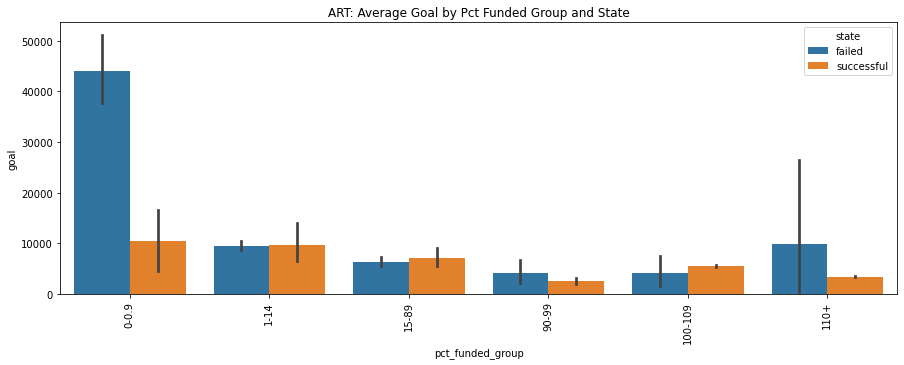

In [372]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("ART: Average Goal by Pct Funded Group and State")
sns.barplot(data = df3_art, x="pct_funded_group", y= "goal", hue = "state")

#How are projects successful with less than 100% funded??

In [373]:
df3_art.loc[(df3_art["pct_funded"]<100) & (df3_art["state"]=="succesful")]

#confirmation that no project with < 100% funded is successful

,name,main_category,category,country,currency,launched,deadline,length_days,goal,backers,state,pct_funded,usd_pledged,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,goal_group,length_days_group,Art Main Category


<AxesSubplot:title={'center':'ART: Average Goal by Main Category and State'}, xlabel='category', ylabel='goal'>

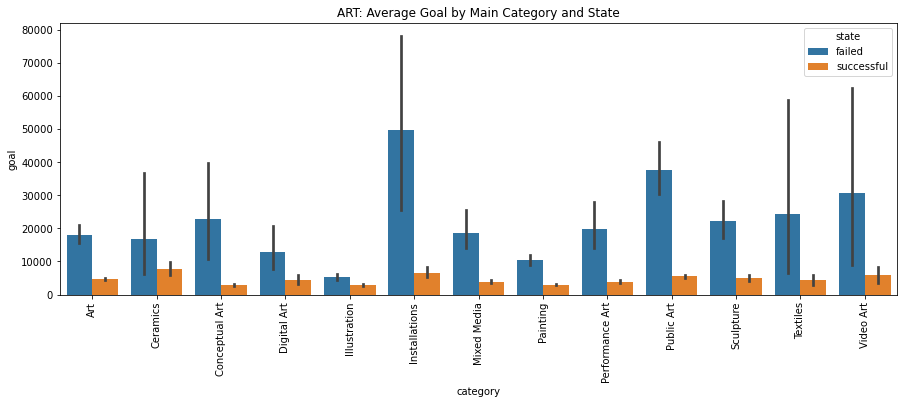

In [374]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("ART: Average Goal by Main Category and State")
sns.barplot(data = df3_art, x="category", y= "goal", hue = "state")

#interesting: average goal of successful projects across all subcategories seems to be the same (next line calculate this)

In [375]:
df3_art["goal"].loc[df3_art["state"]=="successful"].mean()

#mean goal for successful art projects = $4,292

4294.809651955132

In [376]:
df3_art["goal"].loc[df3_art["state"]=="successful"].median()

#median goal for successful art projects = $2,000

2000.0

In [377]:
pd.set_option('display.max_rows', None) ## show all rows in dataset

In [378]:
index_val = ["state", "category", "length_days_group"]

# mean average goal by state, backers_group, length_days_group 
pd.pivot_table(data= df3_art, index=index_val, values=['goal'])

goal
state      category        length_days_group               
failed     Art             0-14                 4875.428524
                           15-29               14783.868224
                           30-59               27586.223508
                           60-100              10231.212083
           Ceramics        0-14               167691.666667
                           15-29                7147.810811
                           30-59               10075.517241
           Conceptual Art  0-14                20702.342857
                           15-29               18308.881115
                           30-59               32957.315822
                           60-100               8750.000000
           Digital Art     0-14                40883.807692
                           15-29               10399.881235
                           30-59               10829.744681
                           60-100               3420.003333
           Illustration    0-14                 1310.573770
                           15-29                4643.820999
                           30-59                8177.029110
                           60-100               5425.000000
           Installations   0-14                 7192.111111
                           15-29               40312.356322
                           30-59               82191.653061
           Mixed Media     0-14                 3596.750000
                           15-29               12522.836438
                           30-59               34172.504648
                           60-100               5000.000000
           Painting        0-14                 4101.875000
                           15-29                9613.981262
                           30-59               13230.770140
                           60-100               3585.000000
           Performance Art 0-14                 6577.263889
                           15-29               13988.421788
                           30-59               31299.774129
                           60-100               8000.000000
           Public Art      0-14                26190.411111
                           15-29               29664.976562
                           30-59               51236.212311
           Sculpture       0-14                 3368.789474
                           15-29               19528.526316
                           30-59               29735.312447
                           60-100               9040.000000
           Textiles        0-14                 3516.666667
                           15-29               31436.170732
                           30-59                9784.243243
           Video Art       0-14                  815.714286
                           15-29               42710.030303
                           30-59                9964.678571
successful Art             0-14                 1538.313492
                           15-29                4247.503866
                           30-59                6529.514355
                           60-100               3721.538462
           Ceramics        0-14                 2335.000000
                           15-29                7496.338462
                           30-59                9826.136364
           Conceptual Art  0-14                 1437.784314
                           15-29                2978.465556
                           30-59                3509.841341
                           60-100               2350.000000
           Digital Art     0-14                 3705.794118
                           15-29                4740.760495
                           30-59                4126.969231
           Illustration    0-14                  849.674419
                           15-29                2922.467828
                           30-59                3779.940092
                           60-100               2068.000000
           Installations   0-14    

#### ART: Regression

Linear Regression (where y represents pct_funded): unsuccessful

In [379]:
df3_art.corr()

# strongest correlation between backers and usd pledged, far second place is backers and pct funded

,length_days,goal,backers,pct_funded,usd_pledged,avg_pledge_per_backer
length_days,1.000000,0.088232,-0.013139,-0.021401,0.020605,0.022539
goal,0.088232,1.000000,0.012020,-0.016796,0.057861,0.042265
backers,-0.013139,0.012020,1.000000,0.101660,0.786388,0.049424
pct_funded,-0.021401,-0.016796,0.101660,1.000000,0.056680,0.002676
usd_pledged,0.020605,0.057861,0.786388,0.056680,1.000000,0.294995
avg_pledge_per_backer,0.022539,0.042265,0.049424,0.002676,0.294995,1.000000


In [403]:
# creating the 1st regression model
result1_art = sm.ols('pct_funded ~ length_days + goal + backers + usd_pledged', data = df3_art).fit()

result1_art.summary()

#Adj R-squared is very low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pct_funded   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     66.81
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           2.82e-56
Time:                        12:24:37   Log-Likelihood:            -1.7631e+05
No. Observations:               21518   AIC:                         3.526e+05
Df Residuals:                   21513   BIC:                         3.527e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     109.5693     17.001      6.445      0.000      76.246     142.892
length_days    -1.2342      0.492     -2.506      0.012      -2.199      -0.269
goal           -0.0002   8.36e-05     -2.010      0.044      -0.000   -4.16e-06
backers         1.5234      0.114     13.377      0.000       1.300       1.747
usd_pledged    -0.0071      0.001     -5.252      0.000      -0.010      -0.004
==============================================================================
Omnibus:                    60698.482   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2312190837.030
Skew:                          37.417   Prob(JB):                         0.00
Kurtosis:                    1607.148   Cond. No.                     2.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [406]:
# creating the 2nd regression model (same as 1st but without intercept)
result2_art = sm.ols('pct_funded ~ length_days + backers + goal + usd_pledged -1', data = df3_art).fit()

result2_art.summary()

#Adj R-squared is better but still very low

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_funded   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              137.7
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                   2.15e-116
Time:                        12:27:16   Log-Likelihood:                     -1.7633e+05
No. Observations:               21518   AIC:                                  3.527e+05
Df Residuals:                   21514   BIC:                                  3.527e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days     1.6876      0.192      8.770      0.000       1.310       2.065
backers         1.6198      0.113     14.335      0.000       1.398       1.841
goal           -0.0002   8.36e-05     -2.141      0.032      -0.000   -1.51e-05
usd_pledged    -0.0074      0.001     -5.454      0.000      -0.010      -0.005
==============================================================================
Omnibus:                    60606.886   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2285797347.031
Skew:                          37.267   Prob(JB):                         0.00
Kurtosis:                    1597.960   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [408]:
# creating the 3rd regression model
result3_art = sm.ols('pct_funded ~ length_days + backers + usd_pledged - 1', data = df3_art).fit()

result3_art.summary()

#Adj R-squared is still very low

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_funded   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              182.0
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                   1.44e-116
Time:                        12:27:37   Log-Likelihood:                     -1.7633e+05
No. Observations:               21518   AIC:                                  3.527e+05
Df Residuals:                   21515   BIC:                                  3.527e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days     1.6180      0.190      8.530      0.000       1.246       1.990
backers         1.6328      0.113     14.469      0.000       1.412       1.854
usd_pledged    -0.0076      0.001     -5.631      0.000      -0.010      -0.005
==============================================================================
Omnibus:                    60601.824   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2284333350.699
Skew:                          37.258   Prob(JB):                         0.00
Kurtosis:                    1597.449   Cond. No.                         245.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:
# creating the 4th regression model
result4_art = sm.ols('pct_funded ~ backers + usd_pledged -1', data = df3_art).fit()

result4_art.summary()

#Adj R-squared is still very low

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_funded   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.021
Method:                 Least Squares   F-statistic:                              235.9
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                   4.60e-102
Time:                        12:29:04   Log-Likelihood:                     -1.7637e+05
No. Observations:               21518   AIC:                                  3.527e+05
Df Residuals:                   21516   BIC:                                  3.528e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
backers         1.8209      0.111     16.426      0.000       1.604       2.038
usd_pledged    -0.0070      0.001     -5.202      0.000      -0.010      -0.004
==============================================================================
Omnibus:                    60579.741   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2281958910.648
Skew:                          37.221   Prob(JB):                         0.00
Kurtosis:                    1596.622   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Logistic Regression

In [ ]:
df3_art

### COMICS 

In [380]:
df3_comics["goal"].loc[df3_comics["state"]=="successful"].mean()

#mean goal for successful comics projects = $5,069

5092.287526558892

### CRAFTS 

In [381]:
df3_crafts["goal"].loc[df3_crafts["state"]=="successful"].mean()

#mean goal for successful crafts projects = $2,947

2947.1605532170774

### DANCE 

In [382]:
df3_dance["goal"].loc[df3_dance["state"]=="successful"].mean()

#mean goal for successful dance projects = $4,443

4454.425340038314

### DESIGN 

In [383]:
df3_design["goal"].loc[df3_design["state"]=="successful"].mean()

#mean goal for successful design projects = $13,335

13352.18159688413

### FASHION 

In [384]:
df3_fash["goal"].loc[df3_fash["state"]=="successful"].mean()

#mean goal for successful fashion projects = $9,532

9554.07309246494

### FILM & VIDEO

In [385]:
df3_film["goal"].loc[df3_film["state"]=="successful"].mean()

#mean goal for successful film & video projects = $9,402

9422.570859060404

### FOOD

In [386]:
df3_food["goal"].loc[df3_food["state"]=="successful"].mean()

#mean goal for successful FOOD projects = $11,188

11205.91453705486

<AxesSubplot:title={'center':'FOOD: Average Goal by Main Category and State'}, xlabel='category', ylabel='goal'>

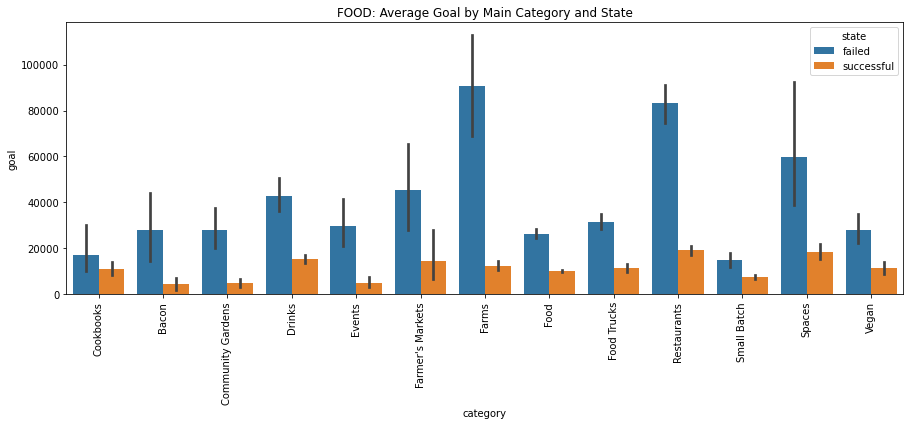

In [387]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("FOOD: Average Goal by Main Category and State")
sns.barplot(data = df3_food, x="category", y= "goal", hue = "state")

#How are projects successful with less than 100% funded??

### GAMES

In [388]:
df3_games["goal"].loc[df3_games["state"]=="successful"].mean()

#mean goal for successful games projects = $8,282

8297.999879489034

### JOURNALISM

In [389]:
df3_journ["goal"].loc[df3_journ["state"]=="successful"].mean()

#mean goal for successful journalism projects = $8,394

8467.702892857142

### MUSIC

In [390]:
df3_music["goal"].loc[df3_music["state"]=="successful"].mean()

#mean goal for successful journalism projects = $5,479

5488.974221428905

### PHOTOGRAPHY

In [391]:
df3_photo["goal"].loc[df3_photo["state"]=="successful"].mean()

#mean goal for successful photography projects = $5,976

5982.49131486676

### PUBLISHING

In [392]:
df3_pub["goal"].loc[df3_pub["state"]=="successful"].mean()

#mean goal for successful FOOD projects = $5,730

5739.996126099417

### TECHNOLOGY

In [393]:
df3_tech["goal"].loc[df3_tech["state"]=="successful"].mean()

#mean goal for successful tech projects = $20,156

20202.096933363555

### THEATER

In [394]:
df3_thea["goal"].loc[df3_thea["state"]=="successful"].mean()

#mean goal for successful theater projects = $4,943

4988.180079405304

# A Deeper Look at Aggregate Data

In [395]:
index_val = ["state", "backers_group", "length_days_group"]

# mean average goal by state, backers_group, length_days_group 
pd.pivot_table(data= df3, index=index_val, values=['goal'])

#once again, we see that a lower goal is important for success

goal
state      backers_group length_days_group               
failed     0-4           0-14                11740.501184
                         15-29               26755.775961
                         30-59               41023.533080
                         60-100               8425.292683
           5-14          0-14                10600.244782
                         15-29               19186.621321
                         30-59               31345.280112
                         60-100               7940.391089
           15-29         0-14                 7205.926938
                         15-29               21335.261938
                         30-59               30280.579345
                         60-100              13344.870543
           30-59         0-14                16753.532164
                         15-29               27352.574534
                         30-59               36778.179582
                         60-100              15675.270536
           60-99         0-14                19894.452381
                         15-29               36747.739147
                         30-59               47721.199313
                         60-100              35390.909091
           100-1500      0-14                23629.500000
                         15-29               63374.850204
                         30-59               70550.267318
                         60-100             139500.000000
successful 0-4           0-14                  279.230971
                         15-29                 357.195978
                         30-59                 499.772727
                         60-100                225.000000
           5-14          0-14                  623.731139
                         15-29                 938.423492
                         30-59                1181.850320
                         60-100                909.861111
           15-29         0-14                 1123.642158
                         15-29                1736.060336
                         30-59                2083.534730
                         60-100               1991.815126
           30-59         0-14                 2106.796390
                         15-29                3269.449964
                         30-59                3794.820270
                         60-100               3576.714286
           60-99         0-14                 3759.565432
                         15-29                5690.584268
                         30-59                6642.096709
                         60-100               5215.812030
           100-1500      0-14                 6613.631783
                         15-29               14817.283627
                         30-59               18507.572040
                         60-100              11636.266532

## Regression on Aggregate Data

In [502]:
df3["state_binary"]=np.where(df3["state"]=="successful", 1, 0)

<AxesSubplot:xlabel='state_binary', ylabel='count'>

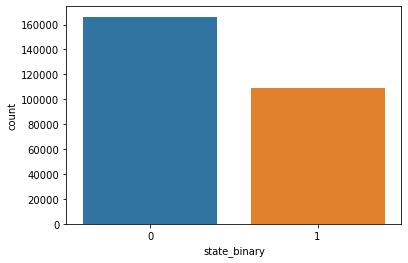

In [503]:
sns.countplot(data=df3, x="state_binary")

In [504]:
mod1 = sm.logit('state_binary ~ length_days + goal + backers + usd_pledged + pct_funded', data=df3).fit()

mod1.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.104474
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:               275010
Model:                          Logit   Df Residuals:                   275004
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.8443
Time:                        17:54:26   Log-Likelihood:                -28731.
converged:                       True   LL-Null:                   -1.8459e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.1733      0.041   -102.468      0.000      -4.253      -4.094
length_days    -0.0162      0.001    -14.971      0.000      -0.018      -0.014
goal        -1.662e-05   1.11e-06    -15.025      0.000   -1.88e-05   -1.45e-05
backers         0.0107      0.000     59.976      0.000       0.010       0.011
usd_pledged -3.604e-05   1.54e-06    -23.359      0.000   -3.91e-05    -3.3e-05
pct_funded      0.0721      0.000    202.802      0.000       0.071       0.073
===============================================================================
"""

In [506]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df3_odds["Sig"] = np.where(df3_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_odds

,OR,pvalue,Sig
Intercept,0.015401,0.000000e+00,Sig
length_days,0.983974,1.141329e-50,Sig
goal,0.999983,5.047202e-51,Sig
backers,1.010789,0.000000e+00,Sig
usd_pledged,0.999964,1.108105e-120,Sig
pct_funded,1.074774,0.000000e+00,Sig


Text(0.5, 1.0, 'Goal vs. Length_Days per State')

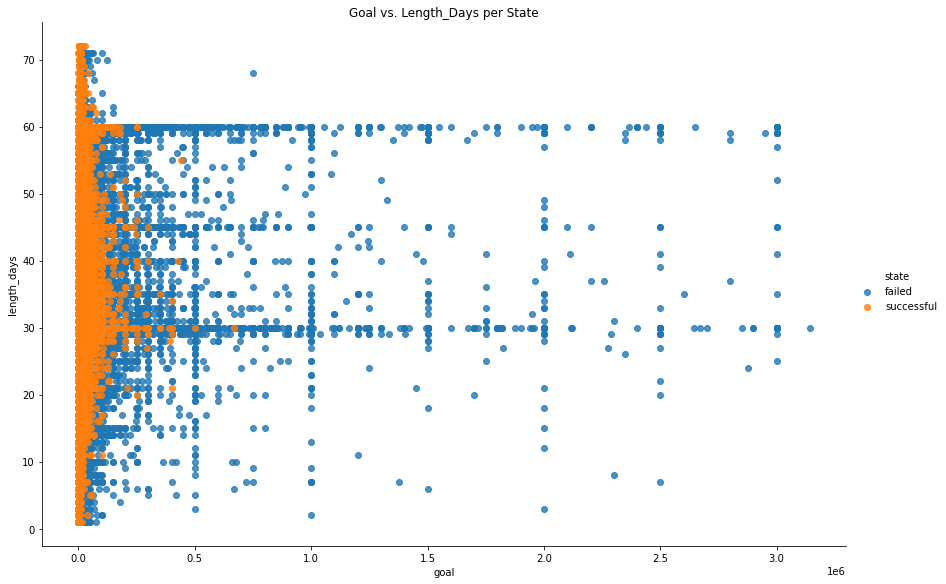

In [396]:
sns.lmplot(data = df3, x = 'goal', y = 'length_days', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Length_Days per State")

#looks like length doesn't matter as much as goal

Text(0.5, 1.0, 'Goal vs. Avg Pledge per Backer')

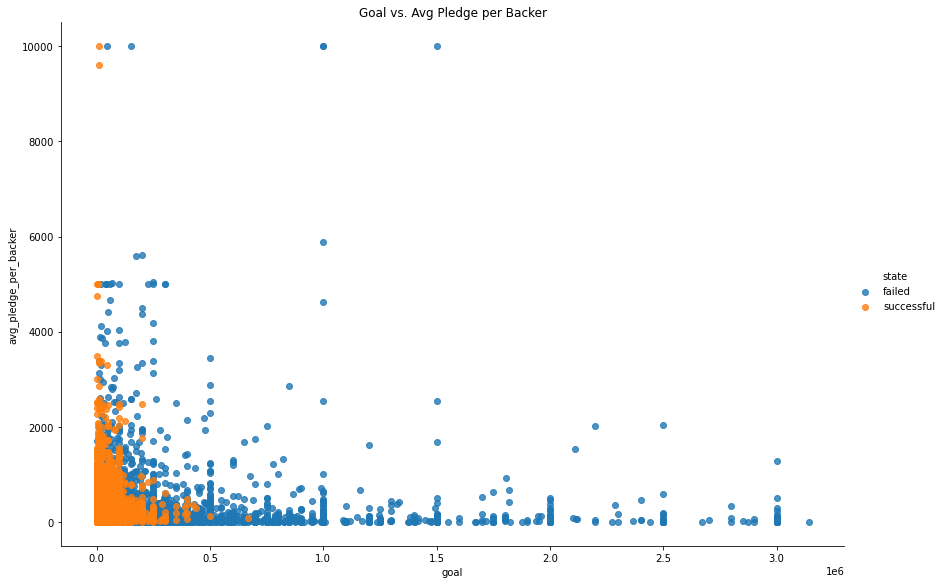

In [397]:
sns.lmplot(data = df3, x = 'goal', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Avg Pledge per Backer")

# reaffirms that lower goal is more successful, directly correlates with average pledge per backer

Text(0.5, 1.0, 'Goal vs. Avg Pledge per Backer')

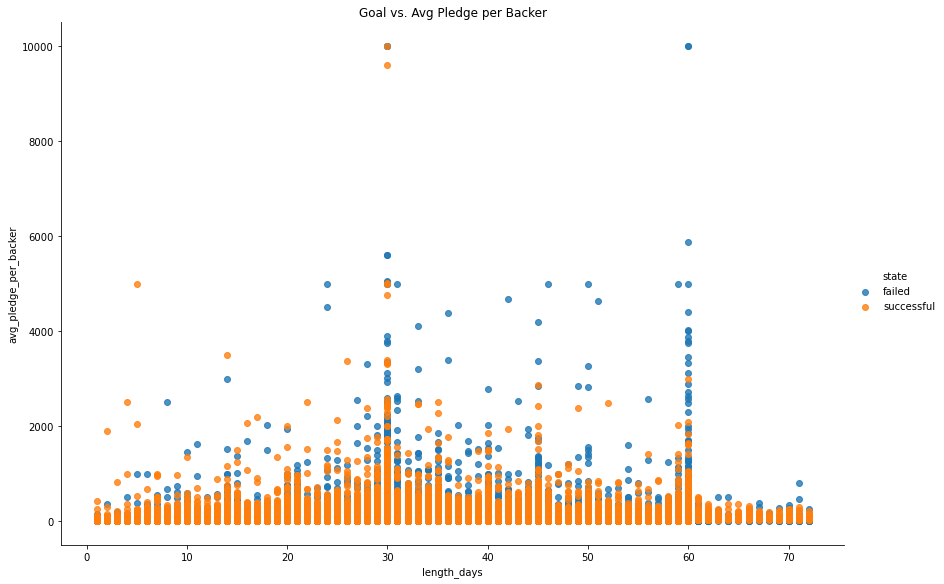

In [398]:
sns.lmplot(data = df3, x = 'length_days', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Avg Pledge per Backer")

#interesting!  no apparent correlation between the two variables.  successful projects have lower goals

In [399]:
# average number of backers and pledges by main category and subcategory 


In [400]:
## state by campaign main category (crosstab)

pd.crosstab(df3["main_category"], df3["state"])

#success rates PER MAIN CATEGORY:
#art: 44%
#comics: 57% 
#crafts: 26%
#dance: 66%
#design: 39%
#fashion: 27%
#film&video: 42%
#food: 28%
#games: 41%
#journalism: 25%
#music: 53%
#photography: 34%
#publishing: 34%
#technology: 22%
#theater: 64%

# Film & Video, Music compose greatest % of overall success (across all main categories) on Kickstarter, as a result of having the most projects
# Dance, Theater, Comics most successful within their own category

state,failed,successful
main_category,,
Art,11979,9539
Comics,3347,4330
Crafts,4626,1663
Dance,1080,2088
Design,12010,7189
Fashion,11478,4207
Film & Video,28840,20860
Food,13575,5195
Games,12936,8298


In [401]:
for col in df3_art:
    print(df3_art[col].unique())

['TheNameCloud' 'Sokovikova-Art'
 'REEFCALENDAR - The Project for our Reefs!' ... 'Short Film Funding!'
 'deforme.' 'Children at Work - What are their stories?']
['Art']
['Art' 'Ceramics' 'Conceptual Art' 'Digital Art' 'Illustration'
 'Installations' 'Mixed Media' 'Painting' 'Performance Art' 'Public Art'
 'Sculpture' 'Textiles' 'Video Art']
['AT' 'AU' 'BE' 'CA' 'CH' 'DE' 'DK' 'ES' 'FR' 'GB' 'HK' 'IE' 'IT' 'MX'
 'NL' 'NO' 'NZ' 'SE' 'US' 'SG' 'LU']
['EUR' 'AUD' 'CAD' 'CHF' 'DKK' 'GBP' 'HKD' 'MXN' 'NOK' 'NZD' 'SEK' 'USD'
 'SGD']
['2015-11-14T23:52:09.000000000' '2016-01-04T18:38:25.000000000'
 '2016-09-13T22:05:56.000000000' ... '2015-05-02T00:14:08.000000000'
 '2016-10-10T02:31:55.000000000' '2015-02-18T17:35:06.000000000']
['2015-12-29T23:52:09.000000000' '2016-02-29T23:59:00.000000000'
 '2016-11-01T11:30:00.000000000' ... '2015-04-24T08:44:58.000000000'
 '2015-06-01T00:14:08.000000000' '2015-03-20T16:35:06.000000000']
[45 56 48 30 60 32 14 28 29 11  8 40 59 10 43 33 15 26 31 20 38 42 

In [402]:
#arts = {"Sub-Category":['Art', 'Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration',
 #'Installations', 'Mixed Media', 'Painting', 'Performance Art', 'Public Art',
 #'Sculpture', 'Textiles', 'Video Art'], 
            # "Success":[
(df.loc[df3_art["category"]=="Art" and df3_art["state"]=='successful'].index).sum()
             #"Fail":["Columbia", "Scotland", "USA", "Canada", "South Africa"], 


#df = pd.DataFrame(passenger)

#df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 